In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout
from keras import backend as K
from keras import optimizers
from keras import losses
from keras.optimizers import SGD

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import initializers

Using TensorFlow backend.


In [4]:
trainSet = pd.read_csv('TitanicComplete.csv')
trainSet.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [5]:
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [0]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms


Total    Percent
Cabin     1014   77.463713
Age       263    20.091673
Embarked  2      0.152788 
Fare      1      0.076394

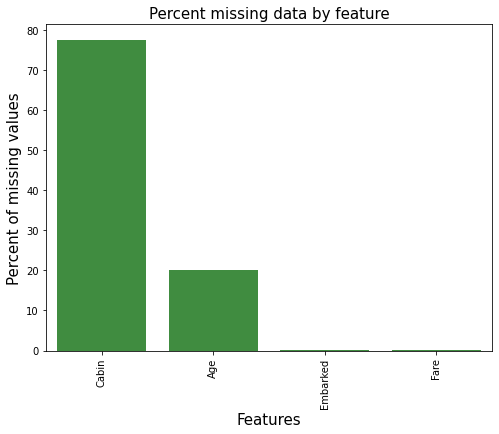

In [7]:
missingdata(trainSet)

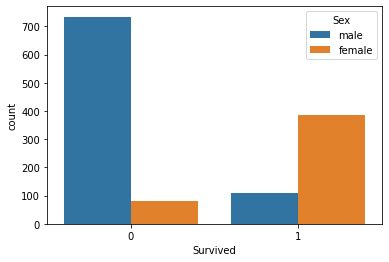

In [8]:
sns.countplot(x = 'Survived',hue = "Sex" , data = trainSet)

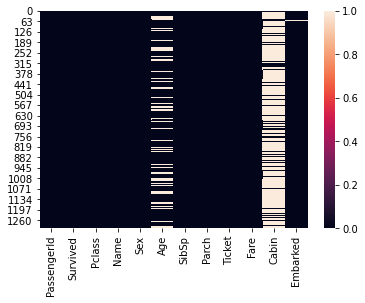

In [9]:
sns.heatmap(trainSet.isnull())

In [0]:
def inpute_cabinv2(col):
  Cabin = col[0]
  if type(Cabin) == str:
    result = ''.join([i for i in Cabin if not i.isdigit()])
    return result
  else:
    return int(0)

In [0]:
trainSet['Cabin'] = trainSet[['Cabin']].apply(inpute_cabinv2,axis =1)

In [0]:
def inpute_ticket(col):
  Cabin = col[0]
  if type(Cabin) == str:
    result = ''.join([i for i in Cabin if not i.isdigit()])
    return result
  else:
    return 0

In [0]:
def inpute_ticketNumber(col):
  Cabin = col[0]
  if type(Cabin) == str:
    result = ''.join([i for i in Cabin if i.isdigit()])
    return result
  else:
    return 0

In [0]:
def inpute_ticketLeter(col):
  Cabin = col[0]
  if type(Cabin) == str:
    result = ''.join([i for i in Cabin if not i.isdigit()])
    return result
  else:
    return 0

In [0]:
def inpute_ticketNumberv2(col):
    Cabin = col[0]
    if Cabin:
        s = Cabin[0]
        number = ''.join(str(ord(c)) for c in s)
        return number
    else:
        return 0

In [0]:
trainSet['TicketLeter'] = trainSet[['Ticket']].apply(inpute_ticketLeter,axis =1)

In [0]:
trainSet['TicketLeter'] = trainSet[['TicketLeter']].apply(inpute_ticketNumberv2,axis =1)

In [0]:
trainSet['TicketLeter'] = trainSet[['TicketLeter']].apply(inpute_ticketNumberv2,axis =1)

In [0]:
trainSet['TicketNumber'] = trainSet[['Ticket']].apply(inpute_ticketNumber,axis =1)

In [0]:
trainSet['Cabin'] = trainSet[['Cabin']].apply(inpute_ticketNumberv2,axis =1)

In [0]:
sex = pd.get_dummies(trainSet['Sex'])

In [0]:
embarked = pd.get_dummies(trainSet['Embarked'])

In [0]:
cabin = pd.get_dummies(trainSet['Cabin'])

In [0]:
ticket = pd.get_dummies(trainSet['Ticket'])

In [0]:
trainSet = pd.concat([trainSet,sex,embarked],axis=1)

In [0]:
trainSet.drop(['Sex','Embarked','Ticket'],axis = 1, inplace = True )

In [27]:
trainSet.head()

PassengerId  Survived  Pclass  \
0  1            0         3        
1  2            1         1        
2  3            1         3        
3  4            1         1        
4  5            0         3        

                                                  Name   Age  SibSp  Parch  \
0  Braund, Mr. Owen Harris                              22.0  1      0       
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  38.0  1      0       
2  Heikkinen, Miss. Laina                               26.0  0      0       
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)         35.0  1      0       
4  Allen, Mr. William Henry                             35.0  0      0       

      Fare Cabin TicketLeter TicketNumber  female  male  C  Q  S  
0  7.2500   0     54          521171       0       1     0  0  1  
1  71.2833  67    56          17599        1       0     1  0  0  
2  7.9250   0     56          23101282     1       0     0  0  1  
3  53.1000  67    0           113803       1       0     0  0  1  
4  8.0500   0     0           373450       0       1     0  0  1

In [0]:
ageFemale = trainSet[(trainSet['female']==1)]

In [0]:
ageFemaleClasse1 = ageFemale[(ageFemale['Pclass']==1)]

In [0]:
ageFemaleClasse2 = ageFemale[(ageFemale['Pclass']==2)]

In [0]:
ageFemaleClasse3 = ageFemale[(ageFemale['Pclass']==3)]

In [0]:
ageMale = trainSet[(trainSet['male']==1)]

In [0]:
ageMaleClasse1 = ageMale[(ageMale['Pclass']==1)]

In [0]:
ageMaleClasse2 = ageMale[(ageMale['Pclass']==2)]

In [0]:
ageMaleClasse3 = ageMale[(ageMale['Pclass']==3)]

In [0]:
ageMaleMeanClasse1 = ageMaleClasse1['Age'].mean()

In [0]:
ageMaleMeanClasse2 = ageMaleClasse2['Age'].mean()

In [0]:
ageMaleMeanClasse3 = ageMaleClasse3['Age'].mean()

In [0]:
ageFemaleMeanClasse1 = ageFemaleClasse1['Age'].mean()
ageFemaleMeanClasse2 = ageFemaleClasse2['Age'].mean()
ageFemaleMeanClasse3 = ageFemaleClasse3['Age'].mean()

In [0]:
def fills_na(cols):
    Age = cols[0]
    Pclass =  cols[1]
    Female =  cols[2]
    
    if pd.isnull(Age):
            if Pclass == 1:
                if Female == 1:
                    return ageFemaleMeanClasse1
                else:
                    return ageMaleMeanClasse1
            elif Pclass ==2:
                if Female == 1:
                    return ageFemaleMeanClasse2
                else:
                    return ageMaleMeanClasse2
            else:
                if Female == 1:
                    return ageFemaleMeanClasse2
                else:
                    return ageMaleMeanClasse3
            
    else:
        return Age

In [0]:
trainSet['Age'] = trainSet[['Age','Pclass','female']].apply(fills_na,axis =1)

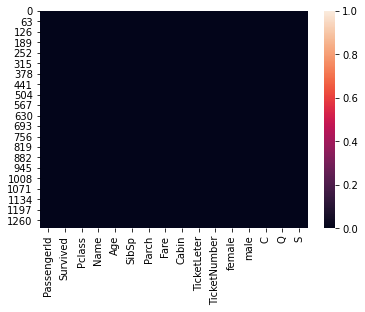

In [42]:
sns.heatmap(trainSet.isnull())

Total   Percent
Fare  1      0.076394

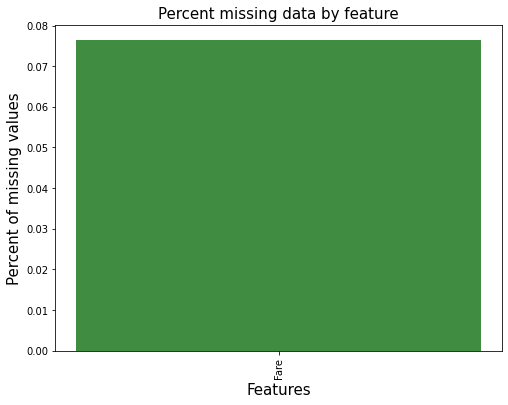

In [43]:
missingdata(trainSet)

In [0]:
#trainSet

In [0]:
def nans(df): return df[df.isnull().any(axis=1)]

In [46]:
nans(trainSet)

PassengerId  Survived  Pclass                Name   Age  SibSp  Parch  \
1043  1044         0         3       Storey, Mr. Thomas  60.5  0      0       

      Fare Cabin TicketLeter TicketNumber  female  male  C  Q  S  
1043 NaN    0     0           3701         0       1     0  0  1

In [0]:
Pclass3 = trainSet[(trainSet['Pclass']==3)]

In [0]:
Pclass3Dead = Pclass3[(Pclass3['Survived']==0)]

In [0]:
Pclass3DeadMale = Pclass3Dead[(Pclass3Dead['male']==1)]

In [0]:
Pclass3DeadMaleMean = Pclass3DeadMale['Age'].mean()

In [0]:
trainSet.loc[trainSet.PassengerId == 1044, 'Fare'] = Pclass3DeadMaleMean

In [52]:
nans(trainSet)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Age, SibSp, Parch, Fare, Cabin, TicketLeter, TicketNumber, female, male, C, Q, S]
Index: []

In [0]:
#missingdata(trainSet)

In [54]:
trainSet.head()

PassengerId  Survived  Pclass  \
0  1            0         3        
1  2            1         1        
2  3            1         3        
3  4            1         1        
4  5            0         3        

                                                  Name   Age  SibSp  Parch  \
0  Braund, Mr. Owen Harris                              22.0  1      0       
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  38.0  1      0       
2  Heikkinen, Miss. Laina                               26.0  0      0       
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)         35.0  1      0       
4  Allen, Mr. William Henry                             35.0  0      0       

      Fare Cabin TicketLeter TicketNumber  female  male  C  Q  S  
0  7.2500   0     54          521171       0       1     0  0  1  
1  71.2833  67    56          17599        1       0     1  0  0  
2  7.9250   0     56          23101282     1       0     0  0  1  
3  53.1000  67    0           113803       1       0     0  0  1  
4  8.0500   0     0           373450       0       1     0  0  1

In [0]:
#source
#https://www.kaggle.com/vinothan/titanic-model-with-90-accuracy

In [0]:
import re
def makeFamily(cols):
    SibSp = cols[0]
    Parch =  cols[1]
    data = SibSp + Parch + 1
    return data

In [0]:
trainSet['FamilySize'] = trainSet[['SibSp','Parch']].apply(makeFamily,axis =1)

In [0]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
    
#dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [0]:
trainSet['Title'] = trainSet['Name'].apply(get_title)

In [0]:
trainSet['Title'] = trainSet['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don','Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [0]:
trainSet['Title'] = trainSet['Title'].replace('Mlle', 'Miss')
trainSet['Title'] = trainSet['Title'].replace('Ms', 'Miss')
trainSet['Title'] = trainSet['Title'].replace('Mme', 'Mrs')

In [0]:
## create bin for age features
for dataset in trainSet:
    trainSet['Age_bin'] = pd.cut(trainSet['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])



In [0]:
## create bin for fare features
for dataset in trainSet:
    trainSet['Fare_bin'] = pd.cut(trainSet['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])

In [0]:
trainSet = pd.get_dummies(trainSet, columns = ["Title","Age_bin","Fare_bin"],
                             prefix=["Title","Age_type","Fare_type"])

In [0]:
trainSet['Cabin'] = trainSet['Cabin'].astype(float)

In [0]:
trainSet['TicketNumber'] = trainSet['TicketNumber'].fillna(0)

In [0]:
trainSet['TicketLeter'] = trainSet['TicketLeter'].fillna(0)

In [0]:
trainSet['TicketNumber'].replace('', 0, inplace=True)

In [0]:
trainSet['TicketLeter'].replace('', 0, inplace=True)

In [0]:
trainSet.drop(['Name'],axis = 1, inplace = True )

In [71]:
trainSet.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Cabin  \
0  1            0         3       22.0  1      0      7.2500   0.0     
1  2            1         1       38.0  1      0      71.2833  67.0    
2  3            1         3       26.0  0      0      7.9250   0.0     
3  4            1         1       35.0  1      0      53.1000  67.0    
4  5            0         3       35.0  0      0      8.0500   0.0     

  TicketLeter TicketNumber  female  male  C  Q  S  FamilySize  Title_Master  \
0  54          521171       0       1     0  0  1  2           0              
1  56          17599        1       0     1  0  0  2           0              
2  56          23101282     1       0     0  0  1  1           0              
3  0           113803       1       0     0  0  1  2           0              
4  0           373450       0       1     0  0  1  1           0              

   Title_Miss  Title_Mr  Title_Mrs  Title_Rare  Age_type_Children  \
0  0           1         0          0           0                   
1  0           0         1          0           0                   
2  1           0         0          0           0                   
3  0           0         1          0           0                   
4  0           1         0          0           0                   

   Age_type_Teenage  Age_type_Adult  Age_type_Elder  Fare_type_Low_fare  \
0  0                 1               0               1                    
1  0                 1               0               0                    
2  0                 1               0               0                    
3  0                 1               0               0                    
4  0                 1               0               0                    

   Fare_type_median_fare  Fare_type_Average_fare  Fare_type_high_fare  
0  0                      0                       0                    
1  0                      0                       1                    
2  1                      0                       0                    
3  0                      0                       1                    
4  1                      0                       0

In [0]:
#trainSet

In [0]:
for dataset in trainSet:
    trainSet[dataset] = trainSet[dataset].astype(float)
    trainSet[dataset] = stats.zscore(trainSet[dataset])

In [0]:
trainSet.drop(['PassengerId'],axis = 1, inplace = True )

In [0]:
y = trainSet["Survived"]

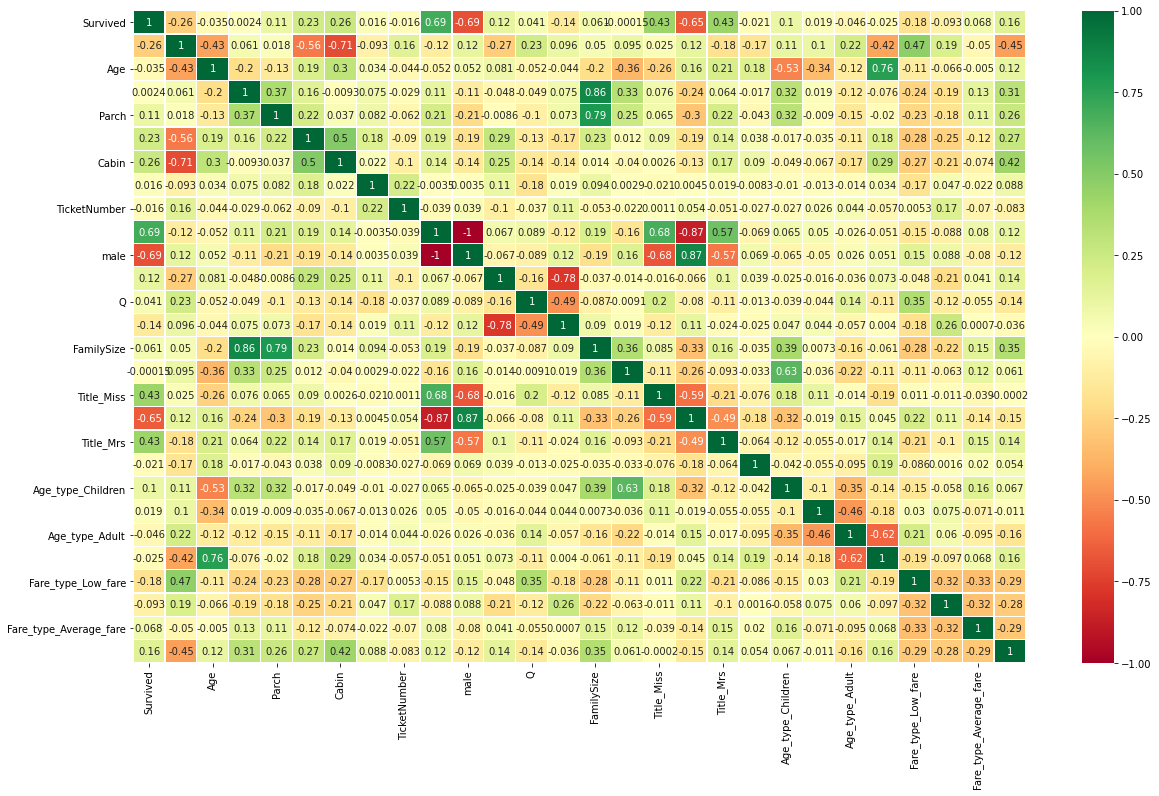

In [76]:
sns.heatmap(trainSet.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [0]:
#trainSet 

In [0]:
trainSet.drop(['Survived'],axis = 1, inplace = True )

In [79]:
trainSet.shape

(1309, 27)

In [80]:
trainSet.head()

Pclass       Age     SibSp  Parch      Fare     Cabin  TicketLeter  \
0  0.841916 -0.584166  0.481288 -0.445 -0.503488 -0.539150  1.596619      
1 -1.546098  0.639860  0.481288 -0.445  0.734601  1.838896  1.678210      
2  0.841916 -0.278160 -0.479087 -0.445 -0.490436 -0.539150  1.678210      
3 -1.546098  0.410355  0.481288 -0.445  0.383026  1.838896 -0.606360      
4  0.841916  0.410355 -0.479087 -0.445 -0.488020 -0.539150 -0.606360      

   TicketNumber    female      male        C        Q         S  FamilySize  \
0 -0.043994     -0.743497  0.743497 -0.50977 -0.32204  0.657394  0.073352     
1 -0.205993      1.344995 -1.344995  1.96167 -0.32204 -1.521159  0.073352     
2  7.220019      1.344995 -1.344995 -0.50977 -0.32204  0.657394 -0.558346     
3 -0.175044      1.344995 -1.344995 -0.50977 -0.32204  0.657394  0.073352     
4 -0.091516     -0.743497  0.743497 -0.50977 -0.32204  0.657394 -0.558346     

   Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  \
0 -0.221084     -0.502625    0.853929 -0.422159  -0.15052      
1 -0.221084     -0.502625   -1.171058  2.368778  -0.15052      
2 -0.221084      1.989556   -1.171058 -0.422159  -0.15052      
3 -0.221084     -0.502625   -1.171058  2.368778  -0.15052      
4 -0.221084     -0.502625    0.853929 -0.422159  -0.15052      

   Age_type_Children  Age_type_Teenage  Age_type_Adult  Age_type_Elder  \
0 -0.278148          -0.365148          0.789981       -0.491869         
1 -0.278148          -0.365148          0.789981       -0.491869         
2 -0.278148          -0.365148          0.789981       -0.491869         
3 -0.278148          -0.365148          0.789981       -0.491869         
4 -0.278148          -0.365148          0.789981       -0.491869         

   Fare_type_Low_fare  Fare_type_median_fare  Fare_type_Average_fare  \
0  1.758017           -0.557055              -0.582937                 
1 -0.568823           -0.557055              -0.582937                 
2 -0.568823            1.795155              -0.582937                 
3 -0.568823           -0.557055              -0.582937                 
4 -0.568823            1.795155              -0.582937                 

   Fare_type_high_fare  
0 -0.501432             
1  1.994288             
2 -0.501432             
3  1.994288             
4 -0.501432

In [0]:
trainSet.to_csv(r"normTitanic.csv", index = False, header=True)

# End of data normalization
# Test Keras model with dropout

In [0]:
model = Sequential() 
model.add(Dense(1485, input_dim=27, activation='relu',kernel_initializer=initializers.random_normal(stddev=0.01)))
model.add(Dropout(0.4))
model.add(Dense(891, activation='relu',kernel_initializer=initializers.random_normal(stddev=0.01)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='relu',kernel_initializer=initializers.random_normal(stddev=0.01)))

In [83]:
#Visualizing the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1485)              41580     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1485)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 891)               1324026   
_________________________________________________________________
dropout_2 (Dropout)          (None, 891)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1784      
Total params: 1,367,390
Trainable params: 1,367,390
Non-trainable params: 0
_________________________________________________________________


In [0]:
notY=1-y

In [0]:
Ycombined = np.vstack((y, notY)).T

In [0]:
# Plot training & validation accuracy values
def plot_accuracyhistory(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [0]:
# Plot training & validation loss values
# when paramethers not found use: print(history.history.keys()) 
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [0]:
#,"sparse_categorical_crossentropy" gebruiken met maar 1 output layer
#,"is_categorical_crossentropy" same as obove

In [0]:
los_list = ["mean_squared_error","mean_absolute_error","mean_absolute_percentage_error","mean_squared_logarithmic_error","squared_hinge","hinge","categorical_hinge"
,"logcosh"
,"huber_loss"
,"categorical_crossentropy"
,"binary_crossentropy"
,"kullback_leibler_divergence"
,"poisson"
,"cosine_proximity"]

This optimizer wil be testet:
<class 'keras.optimizers.Adagrad'>
This los wil be testet:
mean_squared_error


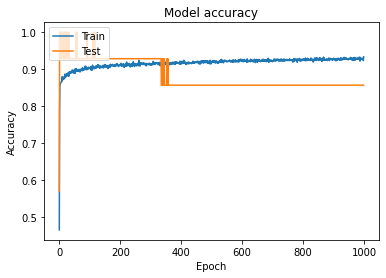

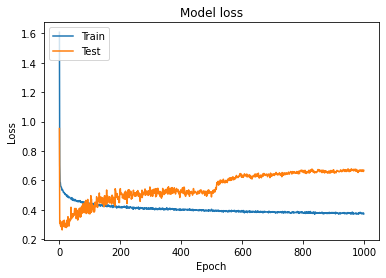

1309/1309 [==============================] - 0s 17us/step
Test score: 0.36014504196809577
Test accuracy: 0.9297173619270325
This los wil be testet:
mean_absolute_error


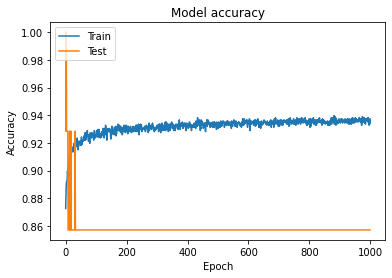

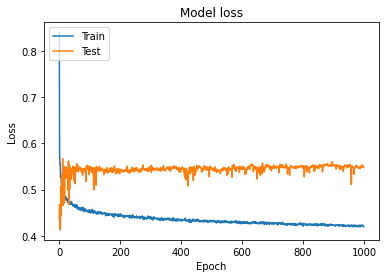

1309/1309 [==============================] - 0s 15us/step
Test score: 0.4014094537956465
Test accuracy: 0.9373567700386047
This los wil be testet:
mean_absolute_percentage_error


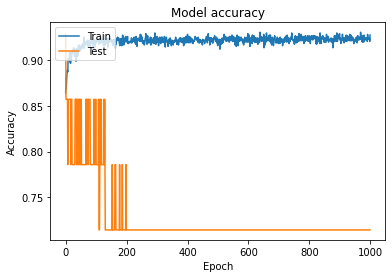

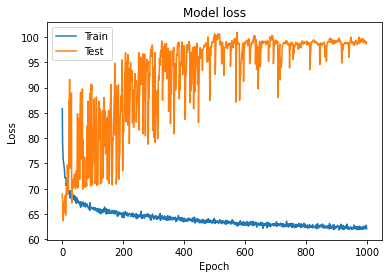

1309/1309 [==============================] - 0s 21us/step
Test score: 61.325857280500976
Test accuracy: 0.9220778942108154
This los wil be testet:
mean_squared_logarithmic_error


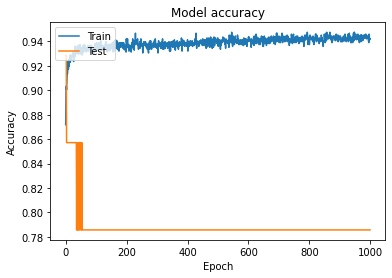

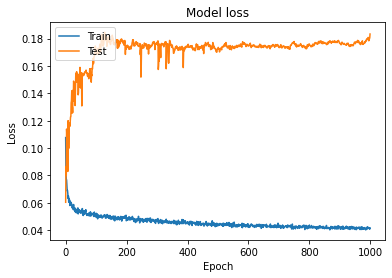

1309/1309 [==============================] - 0s 20us/step
Test score: 0.04005943867111133
Test accuracy: 0.9472879767417908
This los wil be testet:
squared_hinge


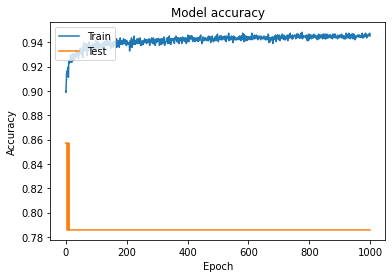

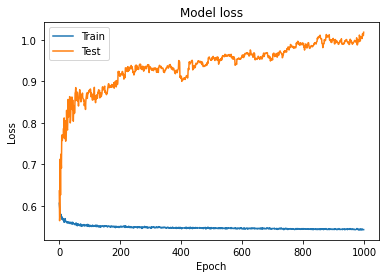

1309/1309 [==============================] - 0s 19us/step
Test score: 0.5465634118700137
Test accuracy: 0.944996178150177
This los wil be testet:
hinge


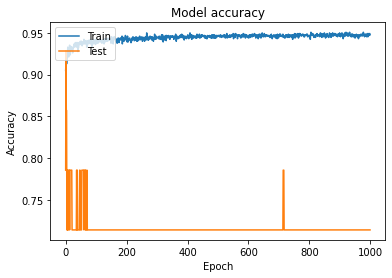

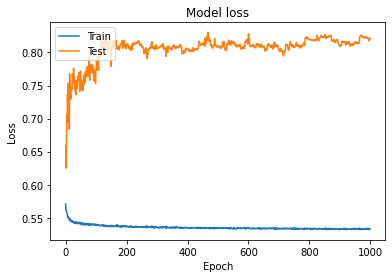

1309/1309 [==============================] - 0s 19us/step
Test score: 0.5346729644297461
Test accuracy: 0.9465240836143494
This los wil be testet:
categorical_hinge


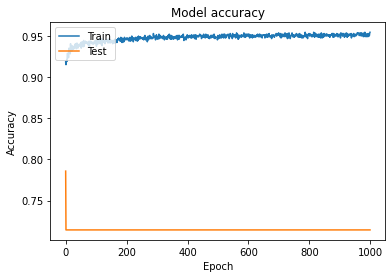

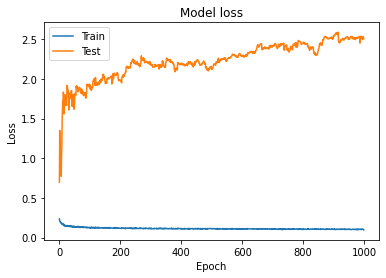

1309/1309 [==============================] - 0s 18us/step
Test score: 0.12359663332130182
Test accuracy: 0.9503437876701355
This los wil be testet:
logcosh


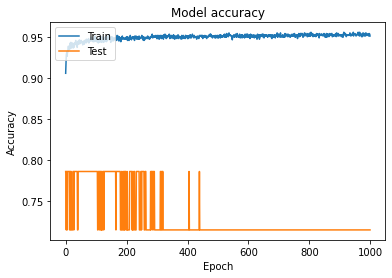

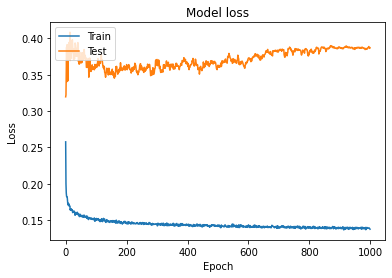

1309/1309 [==============================] - 0s 18us/step
Test score: 0.13779820209245267
Test accuracy: 0.9526355862617493
This los wil be testet:
huber_loss


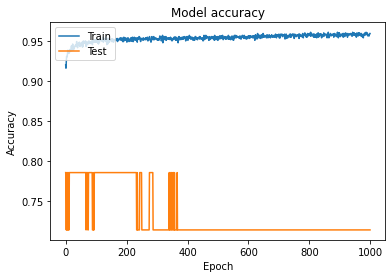

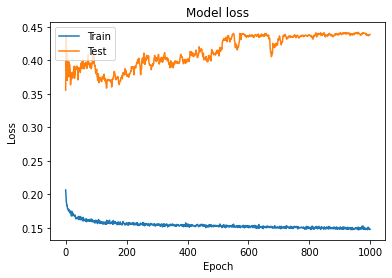

1309/1309 [==============================] - 0s 17us/step
Test score: 0.14831006497349605
Test accuracy: 0.9572192430496216
This los wil be testet:
categorical_crossentropy


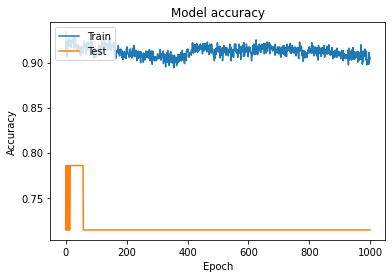

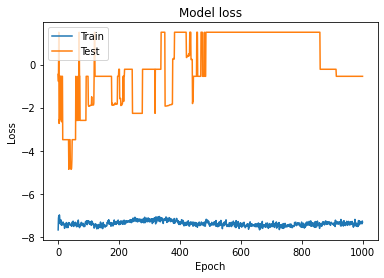

1309/1309 [==============================] - 0s 17us/step
Test score: -7.507825532289203
Test accuracy: 0.913674533367157
This los wil be testet:
binary_crossentropy


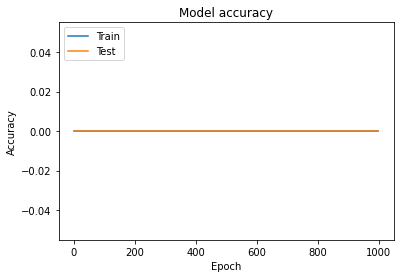

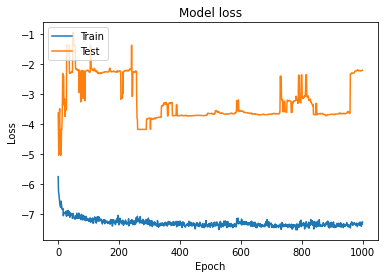

1309/1309 [==============================] - 0s 22us/step
Test score: -7.370570180660172
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


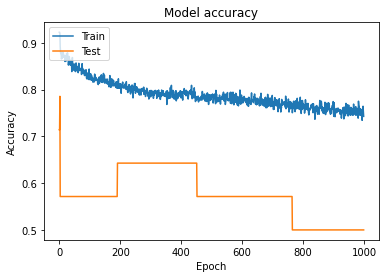

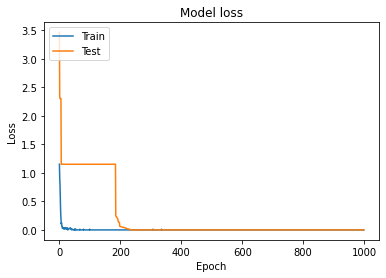

1309/1309 [==============================] - 0s 20us/step
Test score: -1.6041951326634984e-06
Test accuracy: 0.745607316493988
This los wil be testet:
poisson


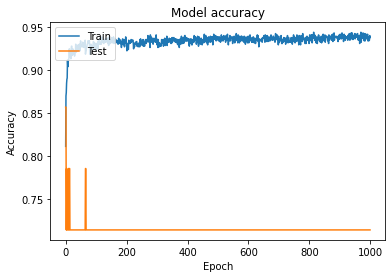

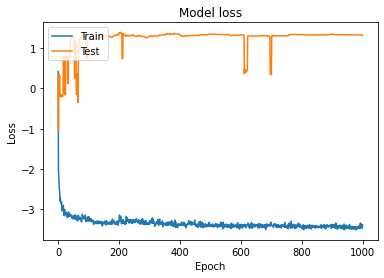

1309/1309 [==============================] - 0s 16us/step
Test score: -3.4501229738169177
Test accuracy: 0.9411764740943909
This los wil be testet:
cosine_proximity


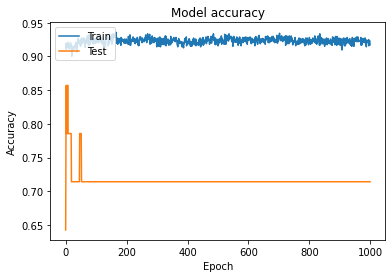

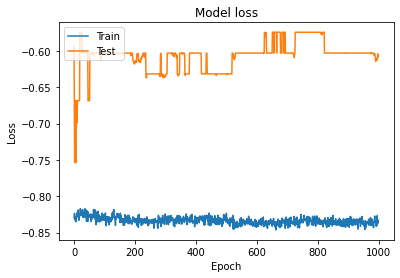

1309/1309 [==============================] - 0s 17us/step
Test score: -0.8515245349376233
Test accuracy: 0.9350649118423462
This optimizer wil be testet:
<class 'keras.optimizers.SGD'>
This los wil be testet:
mean_squared_error


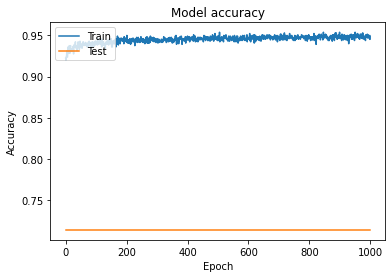

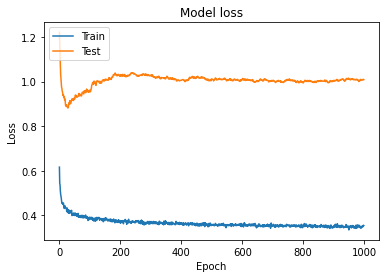

1309/1309 [==============================] - 0s 17us/step
Test score: 0.3344008252309241
Test accuracy: 0.9503437876701355
This los wil be testet:
mean_absolute_error


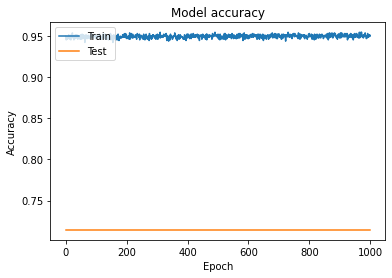

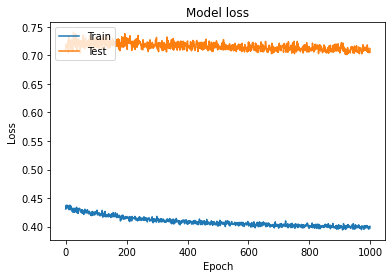

1309/1309 [==============================] - 0s 19us/step
Test score: 0.38664045813795805
Test accuracy: 0.9503437876701355
This los wil be testet:
mean_absolute_percentage_error


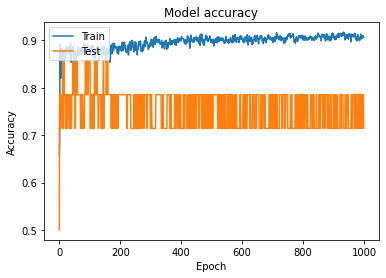

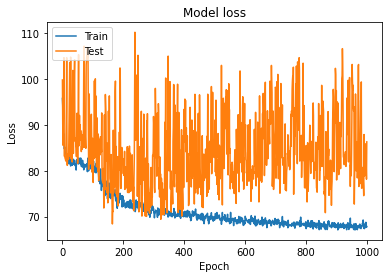

1309/1309 [==============================] - 0s 20us/step
Test score: 66.1961911684507
Test accuracy: 0.9060351252555847
This los wil be testet:
mean_squared_logarithmic_error


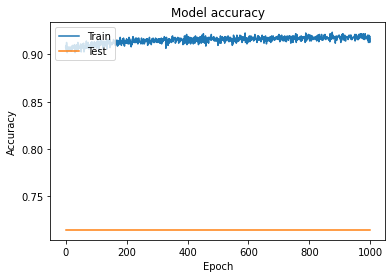

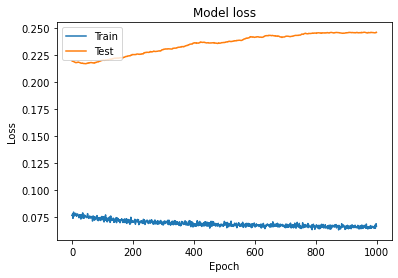

1309/1309 [==============================] - 0s 19us/step
Test score: 0.06432342102980232
Test accuracy: 0.9167303442955017
This los wil be testet:
squared_hinge


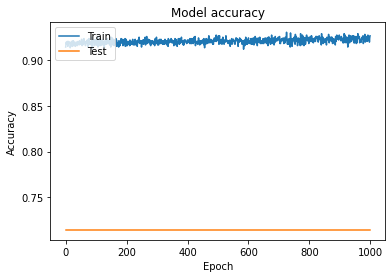

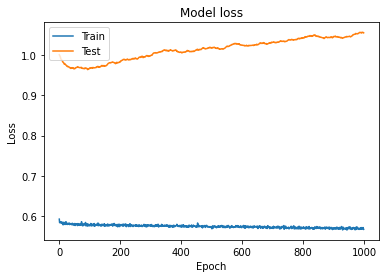

1309/1309 [==============================] - 0s 21us/step
Test score: 0.5713070210288552
Test accuracy: 0.9236057996749878
This los wil be testet:
hinge


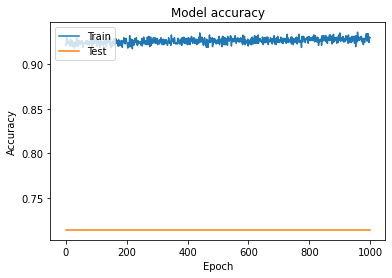

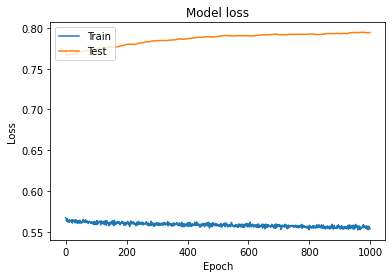

1309/1309 [==============================] - 0s 19us/step
Test score: 0.5549319076847721
Test accuracy: 0.9281894564628601
This los wil be testet:
categorical_hinge


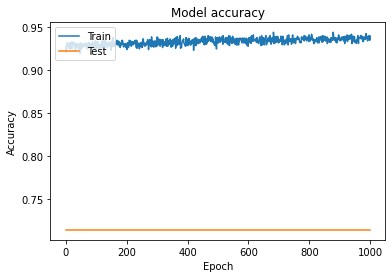

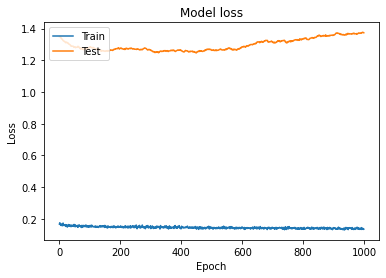

1309/1309 [==============================] - 0s 18us/step
Test score: 0.14021931938126944
Test accuracy: 0.9373567700386047
This los wil be testet:
logcosh


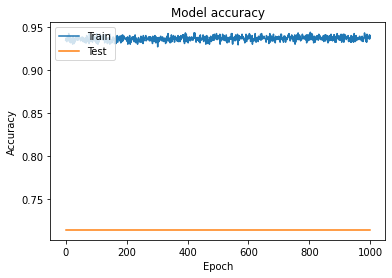

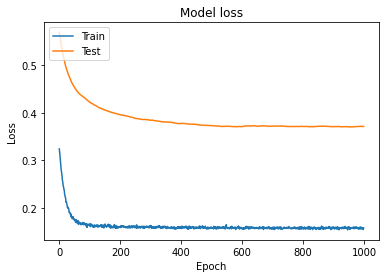

1309/1309 [==============================] - 0s 18us/step
Test score: 0.15319019257794636
Test accuracy: 0.9388846158981323
This los wil be testet:
huber_loss


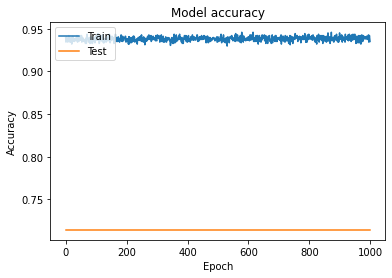

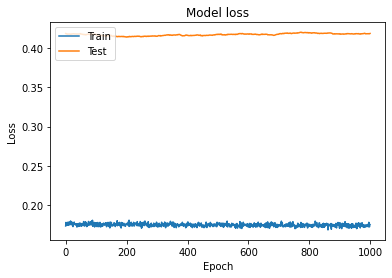

1309/1309 [==============================] - 0s 16us/step
Test score: 0.16913113328133766
Test accuracy: 0.9411764740943909
This los wil be testet:
categorical_crossentropy


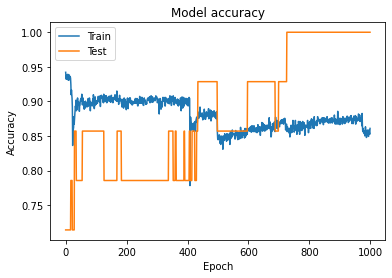

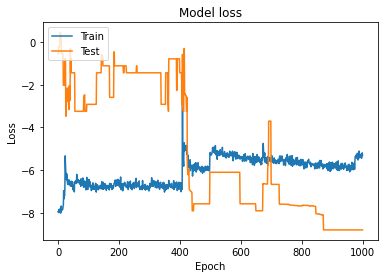

1309/1309 [==============================] - 0s 21us/step
Test score: -5.2016444515872315
Test accuracy: 0.8525592088699341
This los wil be testet:
binary_crossentropy


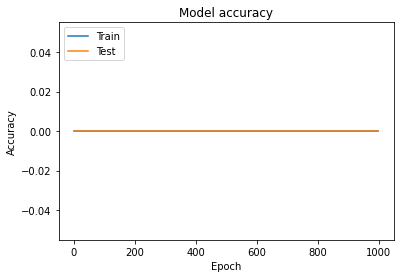

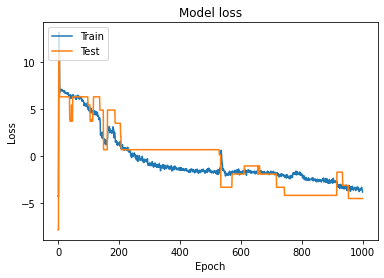

1309/1309 [==============================] - 0s 20us/step
Test score: -3.751973696115638
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


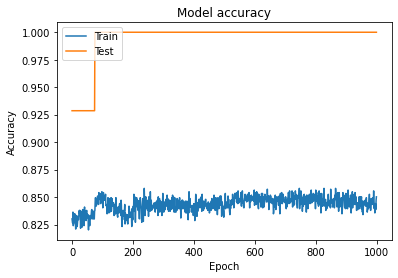

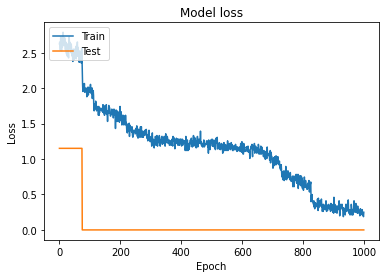

1309/1309 [==============================] - 0s 16us/step
Test score: -1.611809580026602e-06
Test accuracy: 0.8624904751777649
This los wil be testet:
poisson


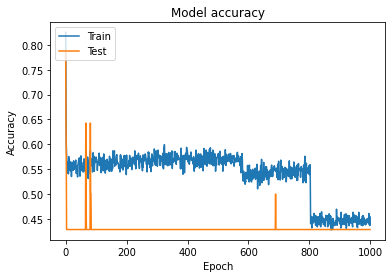

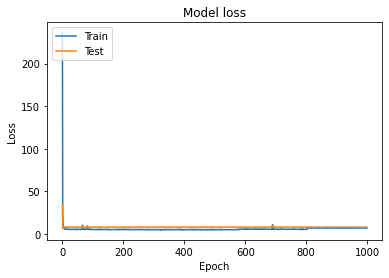

1309/1309 [==============================] - 0s 17us/step
Test score: 8.05904769897461
Test accuracy: 0.37738731503486633
This los wil be testet:
cosine_proximity


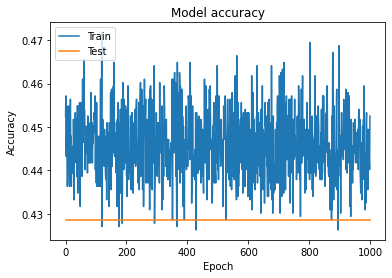

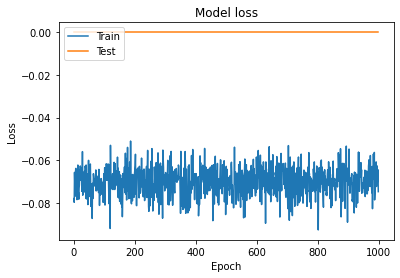

1309/1309 [==============================] - 0s 20us/step
Test score: 0.0
Test accuracy: 0.37738731503486633
This optimizer wil be testet:
<class 'keras.optimizers.Adam'>
This los wil be testet:
mean_squared_error


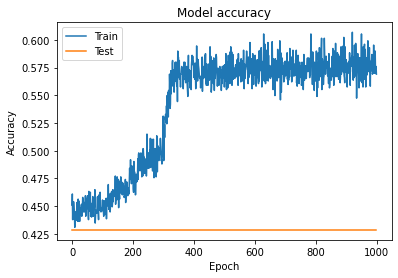

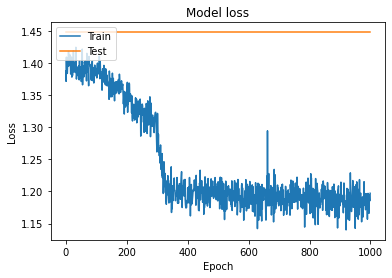

1309/1309 [==============================] - 0s 17us/step
Test score: 1.4999999683079963
Test accuracy: 0.37738731503486633
This los wil be testet:
mean_absolute_error


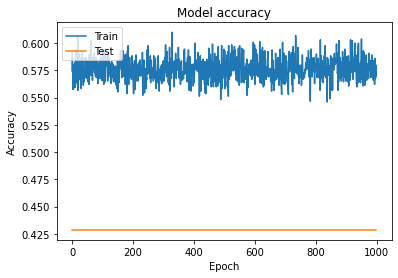

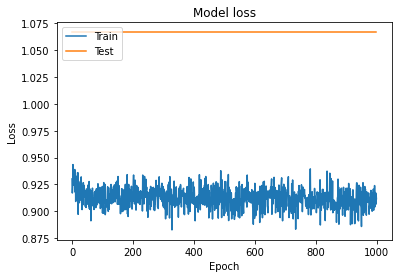

1309/1309 [==============================] - 0s 16us/step
Test score: 1.092078814714168
Test accuracy: 0.37738731503486633
This los wil be testet:
mean_absolute_percentage_error


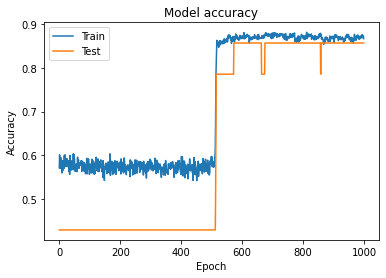

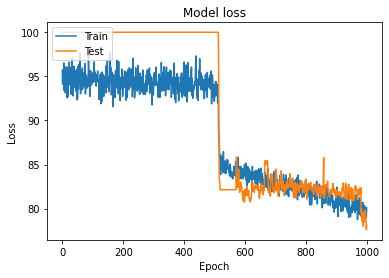

1309/1309 [==============================] - 0s 19us/step
Test score: 79.68602682744573
Test accuracy: 0.8701298832893372
This los wil be testet:
mean_squared_logarithmic_error


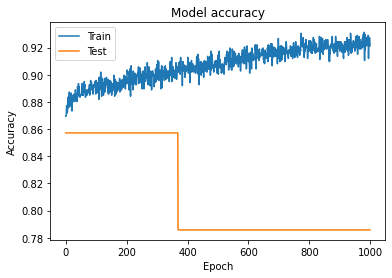

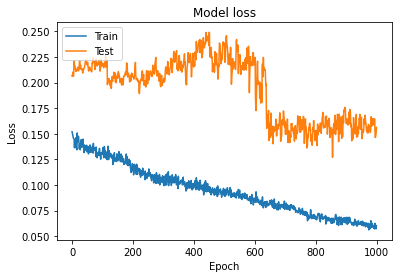

1309/1309 [==============================] - 0s 18us/step
Test score: 0.048776892690461864
Test accuracy: 0.9320091605186462
This los wil be testet:
squared_hinge


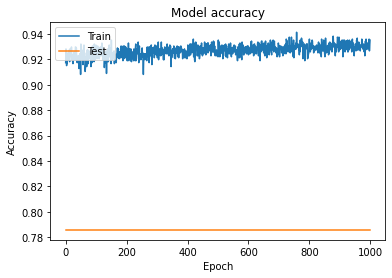

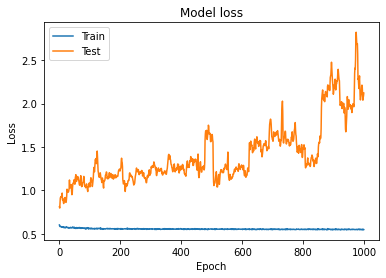

1309/1309 [==============================] - 0s 20us/step
Test score: 0.56130785838259
Test accuracy: 0.9365928173065186
This los wil be testet:
hinge


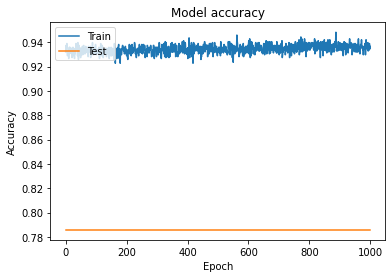

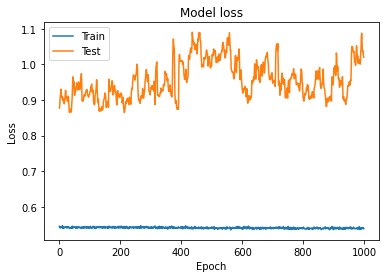

1309/1309 [==============================] - 0s 20us/step
Test score: 0.5387919364857072
Test accuracy: 0.9427043795585632
This los wil be testet:
categorical_hinge


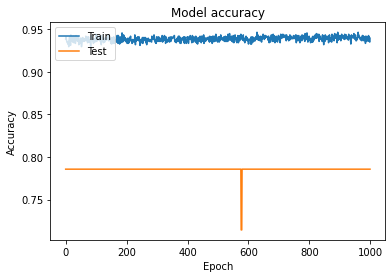

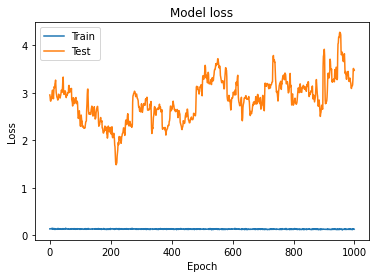

1309/1309 [==============================] - 0s 21us/step
Test score: 0.14799766867464967
Test accuracy: 0.9442322254180908
This los wil be testet:
logcosh


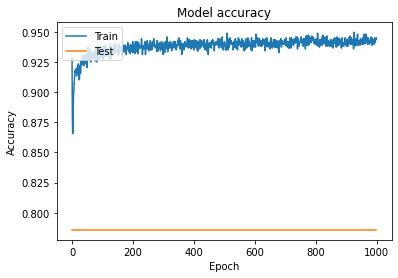

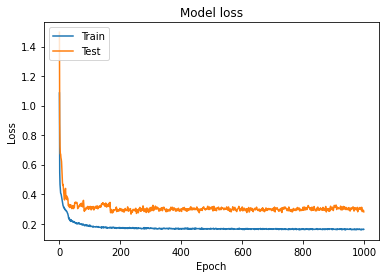

1309/1309 [==============================] - 0s 16us/step
Test score: 0.1489651931479653
Test accuracy: 0.9457601308822632
This los wil be testet:
huber_loss


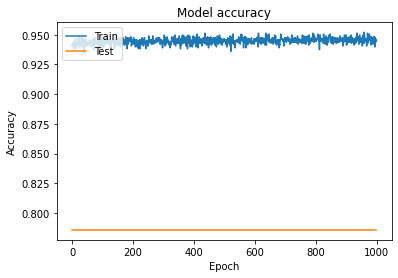

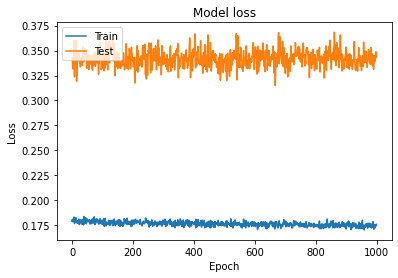

1309/1309 [==============================] - 0s 20us/step
Test score: 0.16241334914887925
Test accuracy: 0.948051929473877
This los wil be testet:
categorical_crossentropy


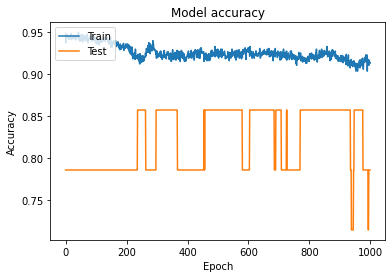

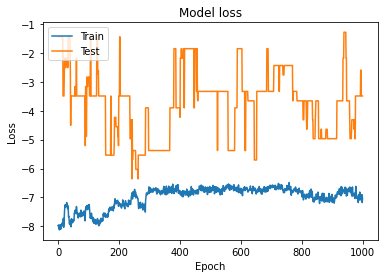

1309/1309 [==============================] - 0s 17us/step
Test score: -7.463996732025496
Test accuracy: 0.9205500483512878
This los wil be testet:
binary_crossentropy


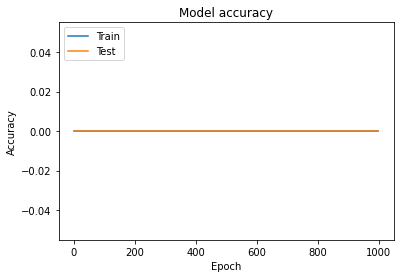

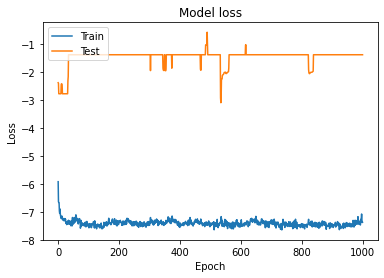

1309/1309 [==============================] - 0s 15us/step
Test score: -7.375745484854448
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


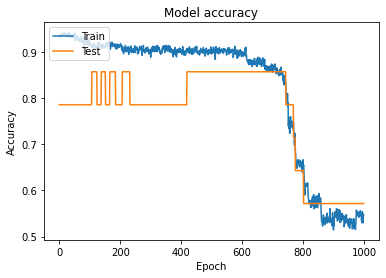

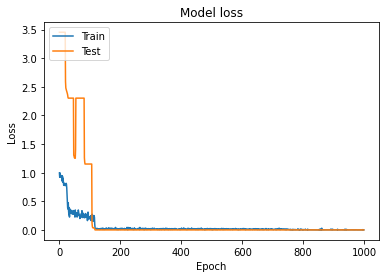

1309/1309 [==============================] - 0s 20us/step
Test score: -1.611809580026602e-06
Test accuracy: 0.5118411183357239
This los wil be testet:
poisson


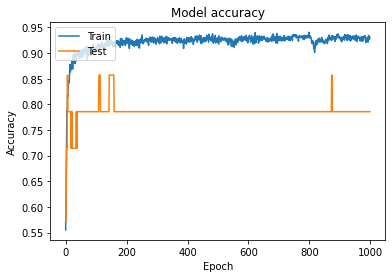

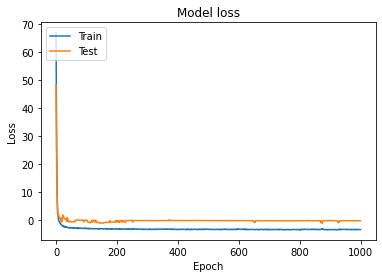

1309/1309 [==============================] - 0s 17us/step
Test score: -3.5074461783226254
Test accuracy: 0.9396485686302185
This los wil be testet:
cosine_proximity


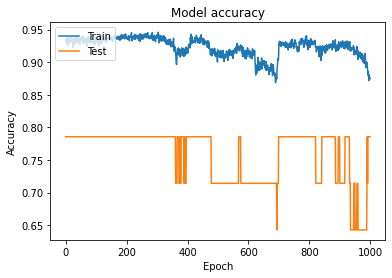

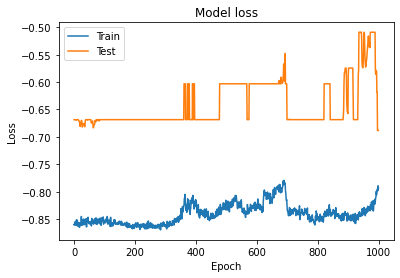

1309/1309 [==============================] - 0s 19us/step
Test score: -0.8149084401003179
Test accuracy: 0.8953399658203125
This optimizer wil be testet:
<class 'keras.optimizers.RMSprop'>
This los wil be testet:
mean_squared_error


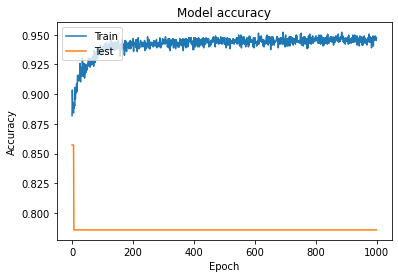

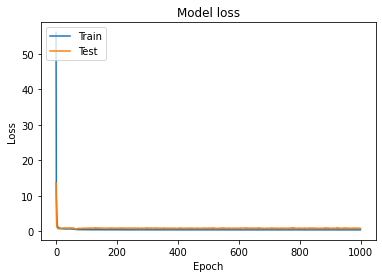

1309/1309 [==============================] - 0s 15us/step
Test score: 0.3407231171774081
Test accuracy: 0.9511077404022217
This los wil be testet:
mean_absolute_error


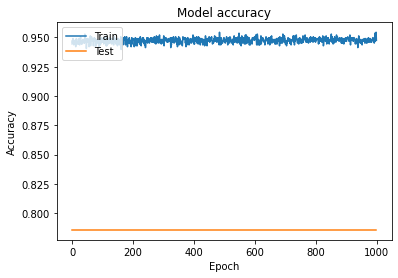

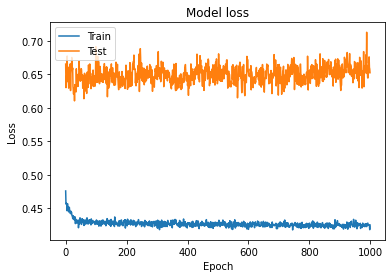

1309/1309 [==============================] - 0s 16us/step
Test score: 0.39188044958209334
Test accuracy: 0.9503437876701355
This los wil be testet:
mean_absolute_percentage_error


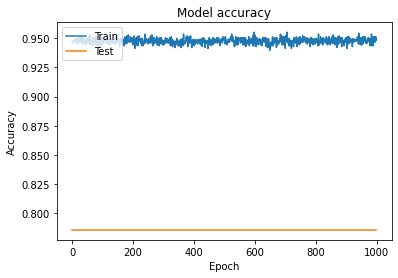

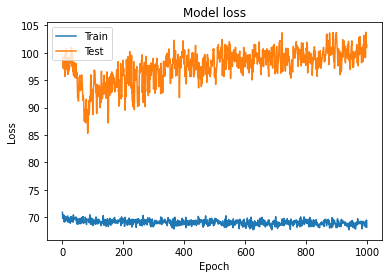

1309/1309 [==============================] - 0s 17us/step
Test score: 66.20611789665485
Test accuracy: 0.9503437876701355
This los wil be testet:
mean_squared_logarithmic_error


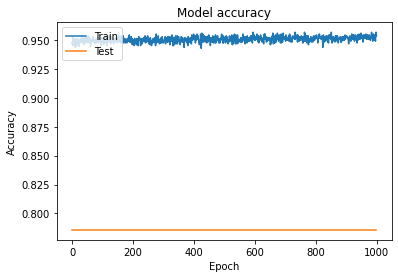

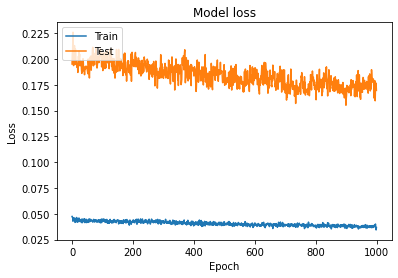

1309/1309 [==============================] - 0s 17us/step
Test score: 0.03157944168477135
Test accuracy: 0.9533995389938354
This los wil be testet:
squared_hinge


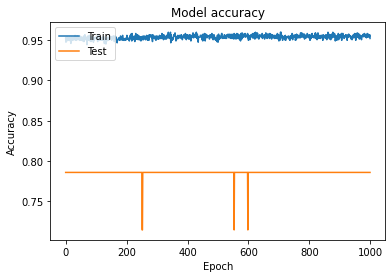

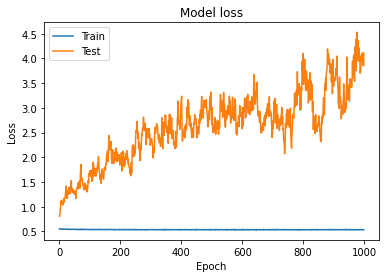

1309/1309 [==============================] - 0s 18us/step
Test score: 0.5649722698902337
Test accuracy: 0.955691397190094
This los wil be testet:
hinge


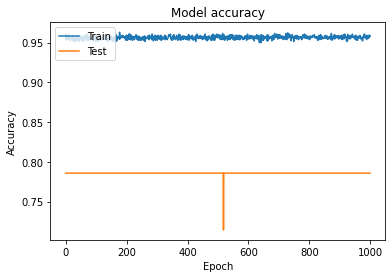

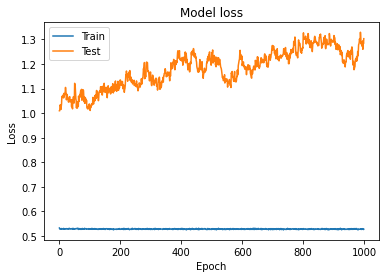

1309/1309 [==============================] - 0s 20us/step
Test score: 0.5318902205473781
Test accuracy: 0.958747148513794
This los wil be testet:
categorical_hinge


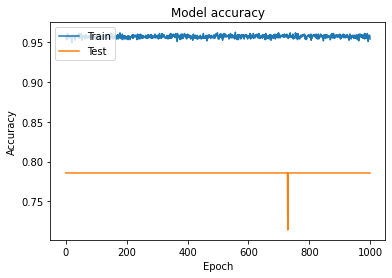

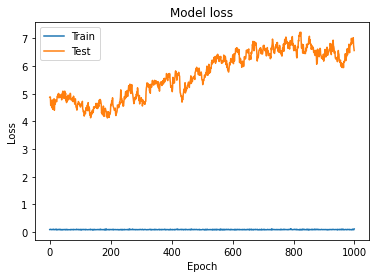

1309/1309 [==============================] - 0s 16us/step
Test score: 0.1484362235331212
Test accuracy: 0.958747148513794
This los wil be testet:
logcosh


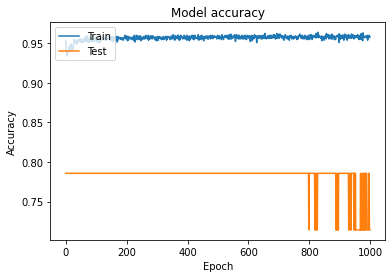

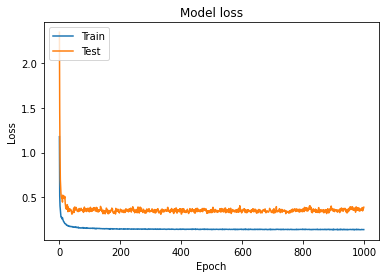

1309/1309 [==============================] - 0s 18us/step
Test score: 0.13554955744579422
Test accuracy: 0.9579831957817078
This los wil be testet:
huber_loss


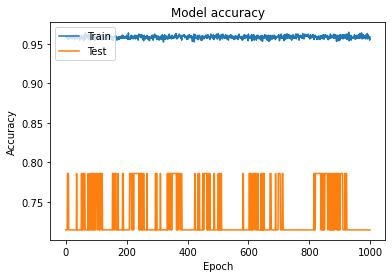

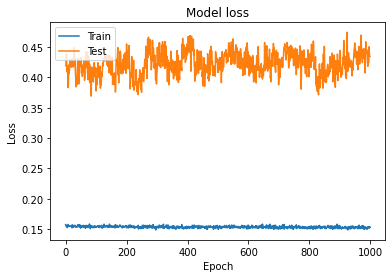

1309/1309 [==============================] - 0s 23us/step
Test score: 0.15088416061117232
Test accuracy: 0.9595111012458801
This los wil be testet:
categorical_crossentropy


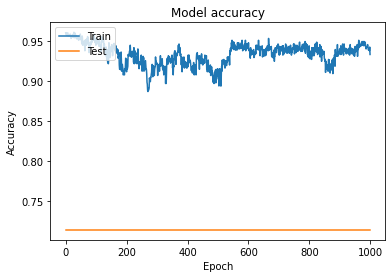

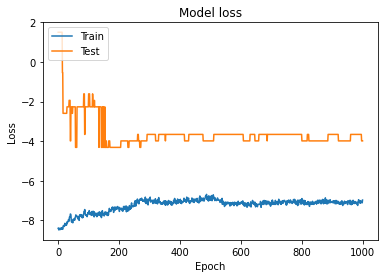

1309/1309 [==============================] - 0s 26us/step
Test score: -7.194675701642601
Test accuracy: 0.9533995389938354
This los wil be testet:
binary_crossentropy


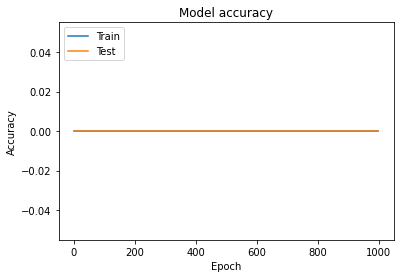

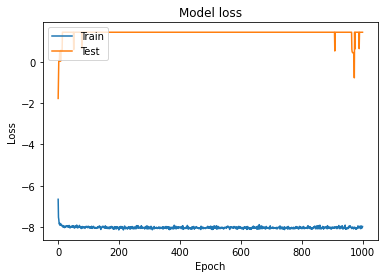

1309/1309 [==============================] - 0s 20us/step
Test score: -7.939805812604378
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


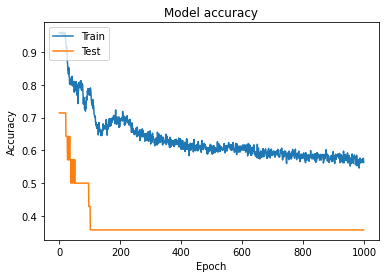

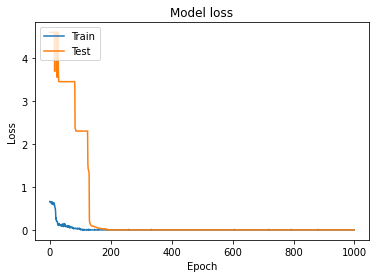

1309/1309 [==============================] - 0s 19us/step
Test score: -1.611809580026602e-06
Test accuracy: 0.5210084319114685
This los wil be testet:
poisson


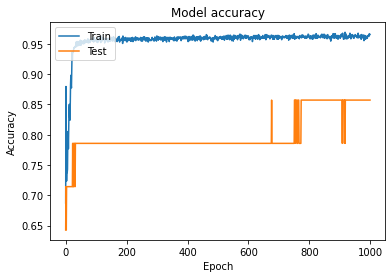

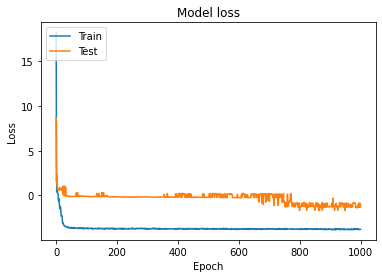

1309/1309 [==============================] - 0s 21us/step
Test score: -3.8421963187940618
Test accuracy: 0.9633308053016663
This los wil be testet:
cosine_proximity


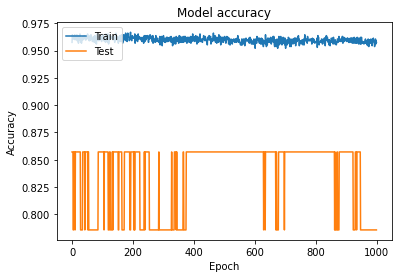

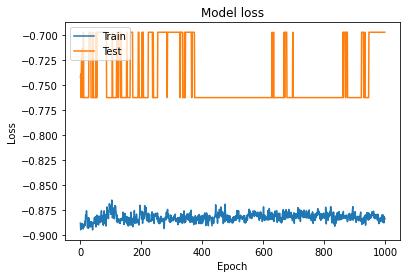

1309/1309 [==============================] - 0s 24us/step
Test score: -0.8857552196526
Test accuracy: 0.9610389471054077
This optimizer wil be testet:
<class 'keras.optimizers.Adadelta'>
This los wil be testet:
mean_squared_error


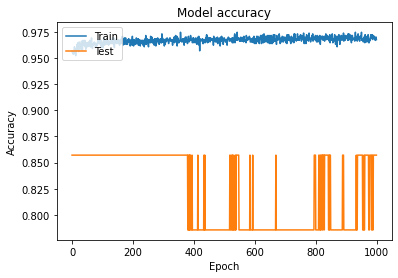

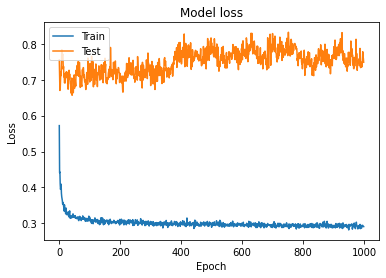

1309/1309 [==============================] - 0s 21us/step
Test score: 0.29096791346260753
Test accuracy: 0.9717341661453247
This los wil be testet:
mean_absolute_error


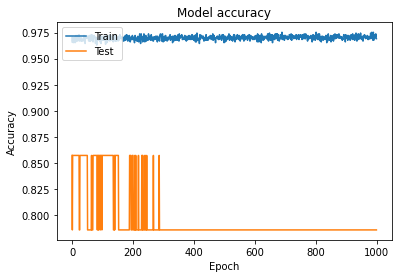

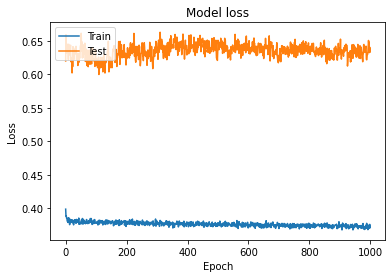

1309/1309 [==============================] - 0s 21us/step
Test score: 0.37872584718525
Test accuracy: 0.9732620120048523
This los wil be testet:
mean_absolute_percentage_error


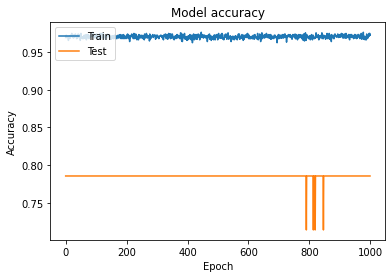

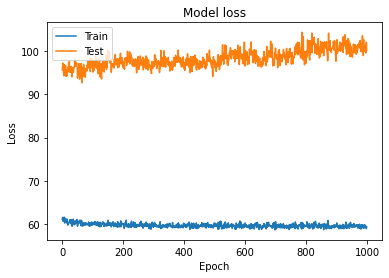

1309/1309 [==============================] - 0s 24us/step
Test score: 59.42875506442589
Test accuracy: 0.9709702134132385
This los wil be testet:
mean_squared_logarithmic_error


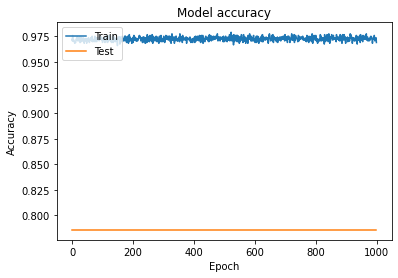

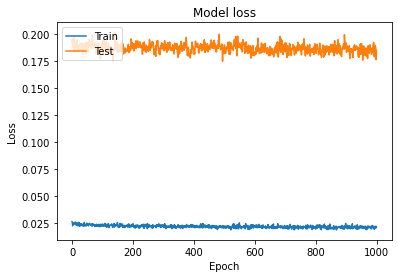

1309/1309 [==============================] - 0s 23us/step
Test score: 0.019647776818712583
Test accuracy: 0.9732620120048523
This los wil be testet:
squared_hinge


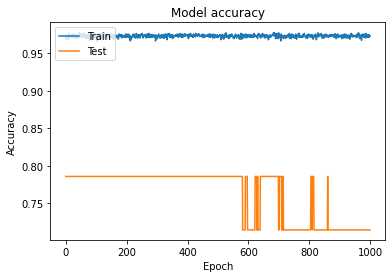

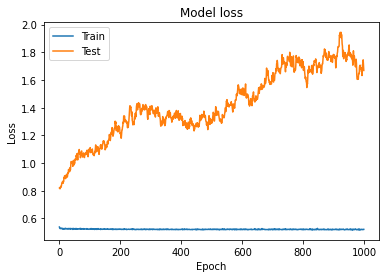

1309/1309 [==============================] - 0s 24us/step
Test score: 0.5304638876816623
Test accuracy: 0.9724981188774109
This los wil be testet:
hinge


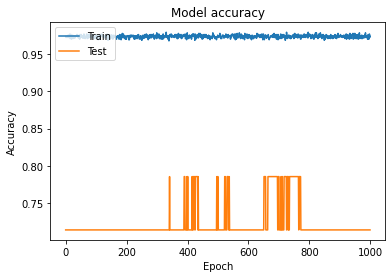

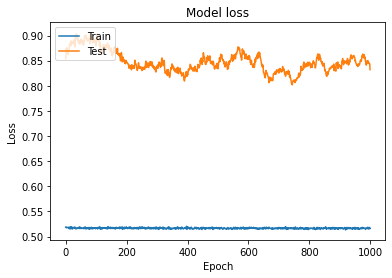

1309/1309 [==============================] - 0s 24us/step
Test score: 0.5182182260648817
Test accuracy: 0.9724981188774109
This los wil be testet:
categorical_hinge


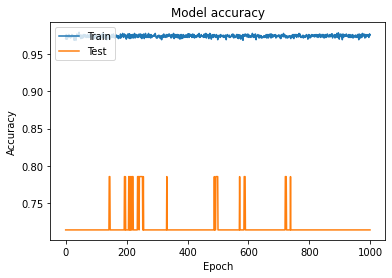

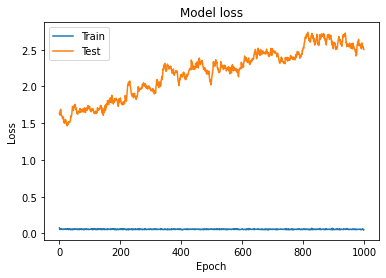

1309/1309 [==============================] - 0s 22us/step
Test score: 0.0746267142188376
Test accuracy: 0.9732620120048523
This los wil be testet:
logcosh


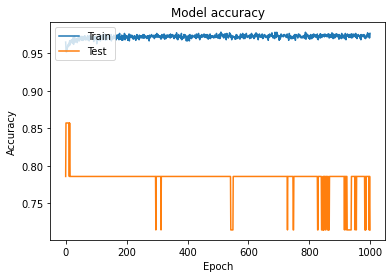

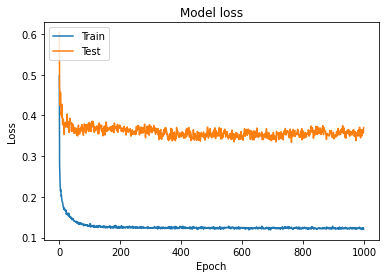

1309/1309 [==============================] - 0s 22us/step
Test score: 0.12071535483036813
Test accuracy: 0.9747899174690247
This los wil be testet:
huber_loss


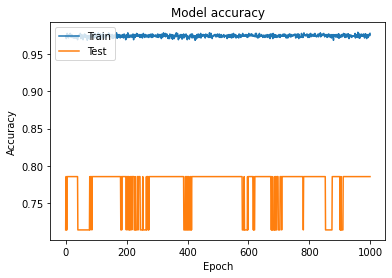

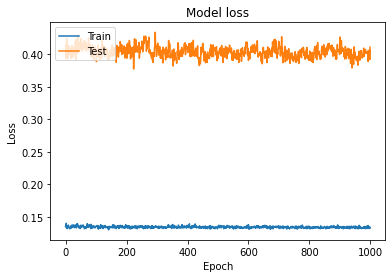

1309/1309 [==============================] - 0s 21us/step
Test score: 0.13243539240908495
Test accuracy: 0.9740259647369385
This los wil be testet:
categorical_crossentropy


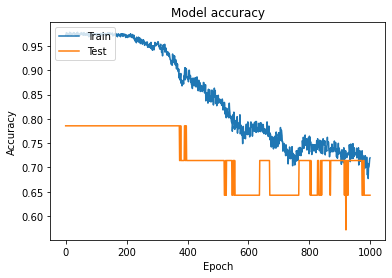

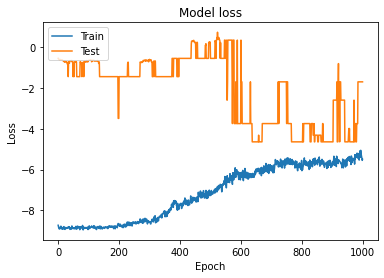

1309/1309 [==============================] - 0s 27us/step
Test score: -5.332915405902907
Test accuracy: 0.6928953528404236
This los wil be testet:
binary_crossentropy


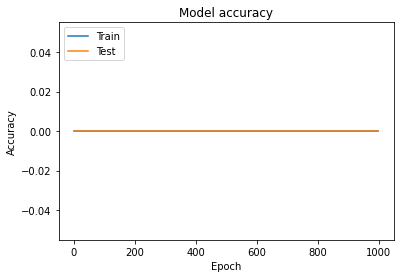

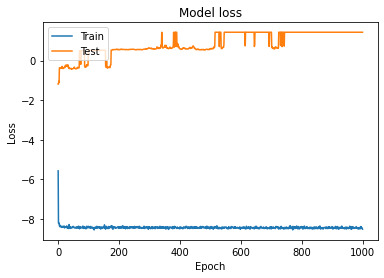

1309/1309 [==============================] - 0s 20us/step
Test score: -8.3858915275522
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


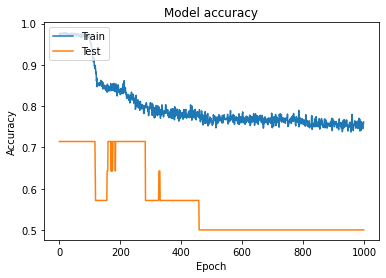

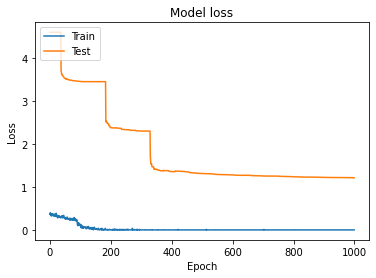

1309/1309 [==============================] - 0s 22us/step
Test score: 0.013002013102448027
Test accuracy: 0.7135217785835266
This los wil be testet:
poisson


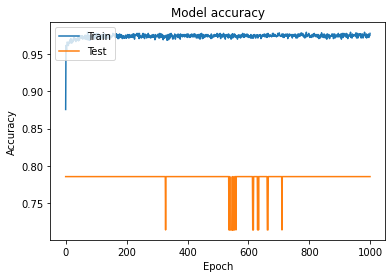

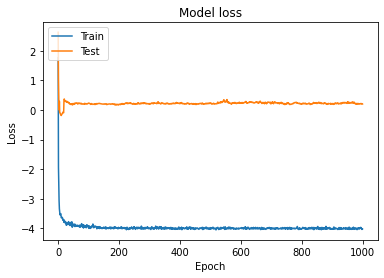

1309/1309 [==============================] - 0s 20us/step
Test score: -3.998215414521073
Test accuracy: 0.9755538702011108
This los wil be testet:
cosine_proximity


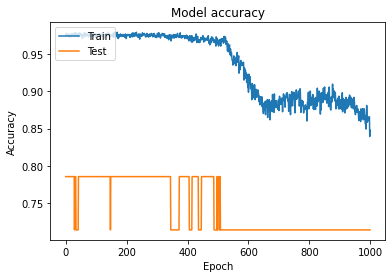

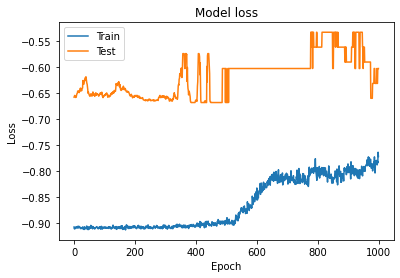

1309/1309 [==============================] - 0s 20us/step
Test score: -0.7866039312550638
Test accuracy: 0.8548510074615479
This optimizer wil be testet:
<class 'keras.optimizers.Adamax'>
This los wil be testet:
mean_squared_error


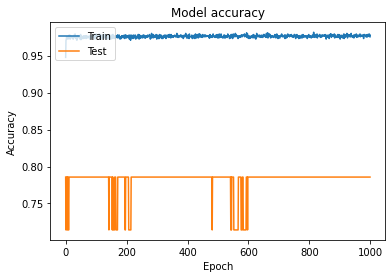

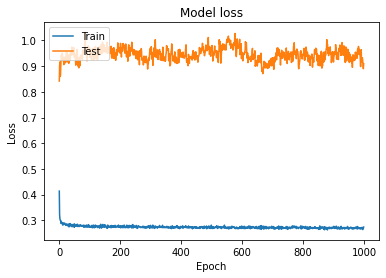

1309/1309 [==============================] - 0s 23us/step
Test score: 0.26912710778671334
Test accuracy: 0.9770817160606384
This los wil be testet:
mean_absolute_error


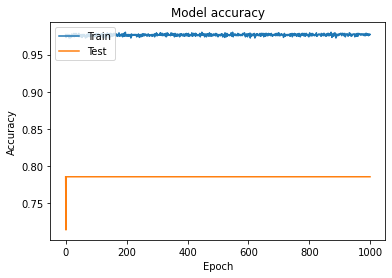

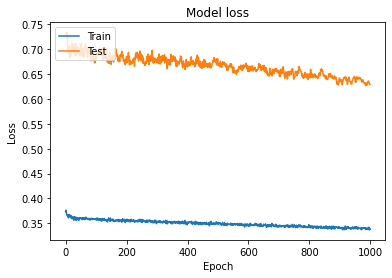

1309/1309 [==============================] - 0s 21us/step
Test score: 0.33587948419011393
Test accuracy: 0.976317822933197
This los wil be testet:
mean_absolute_percentage_error


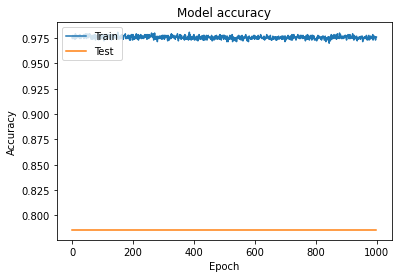

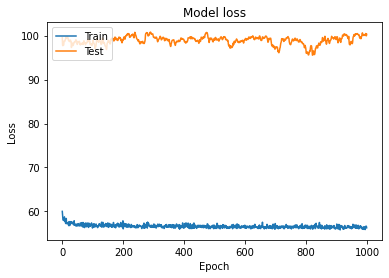

1309/1309 [==============================] - 0s 24us/step
Test score: 56.2644457660439
Test accuracy: 0.9740259647369385
This los wil be testet:
mean_squared_logarithmic_error


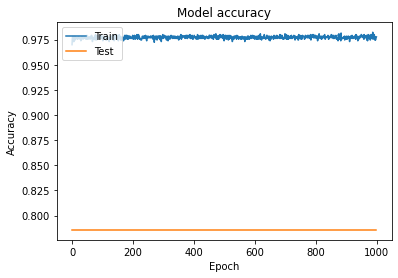

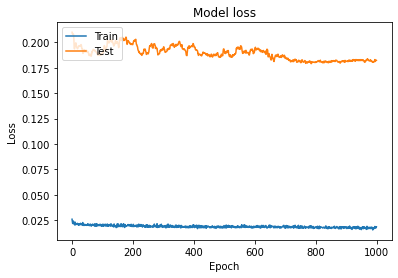

1309/1309 [==============================] - 0s 21us/step
Test score: 0.01768234038314262
Test accuracy: 0.9770817160606384
This los wil be testet:
squared_hinge


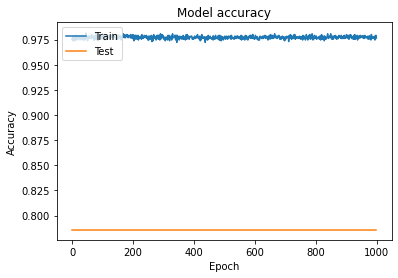

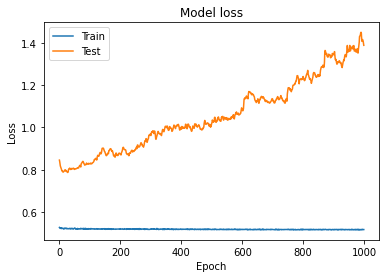

1309/1309 [==============================] - 0s 22us/step
Test score: 0.5250721526018438
Test accuracy: 0.9755538702011108
This los wil be testet:
hinge


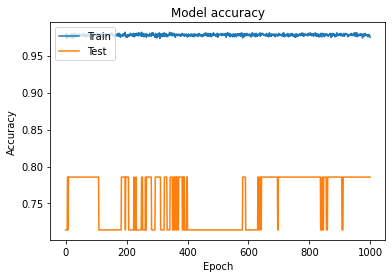

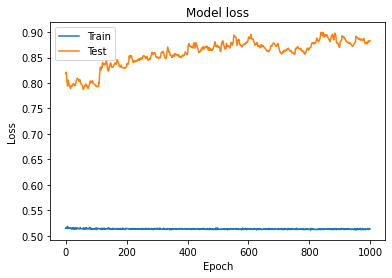

1309/1309 [==============================] - 0s 21us/step
Test score: 0.5157453103134703
Test accuracy: 0.976317822933197
This los wil be testet:
categorical_hinge


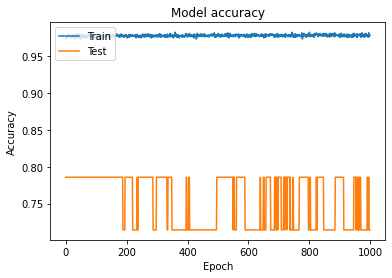

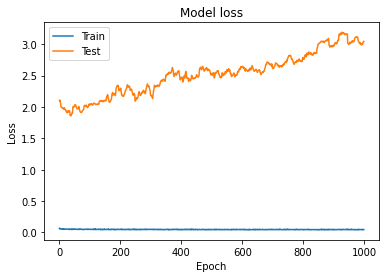

1309/1309 [==============================] - 0s 20us/step
Test score: 0.07356401691120758
Test accuracy: 0.976317822933197
This los wil be testet:
logcosh


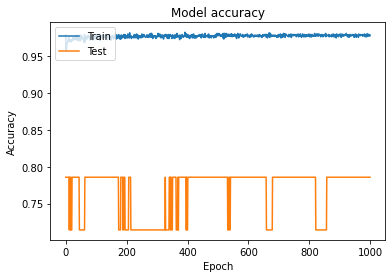

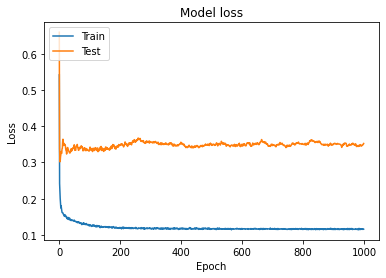

1309/1309 [==============================] - 0s 21us/step
Test score: 0.11595223526448308
Test accuracy: 0.9778456687927246
This los wil be testet:
huber_loss


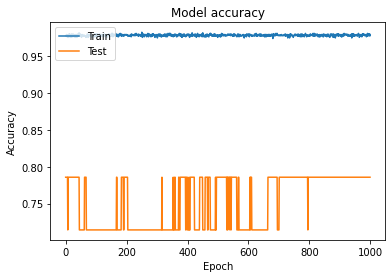

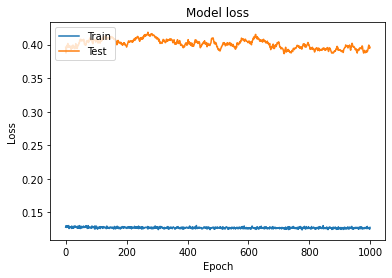

1309/1309 [==============================] - 0s 21us/step
Test score: 0.12711056008240573
Test accuracy: 0.9770817160606384
This los wil be testet:
categorical_crossentropy


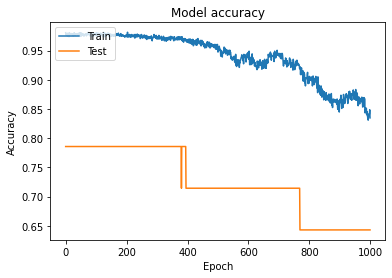

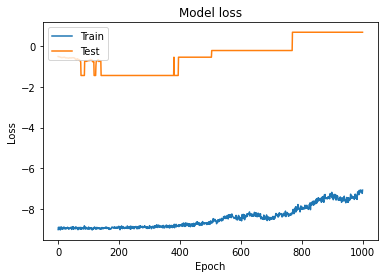

1309/1309 [==============================] - 0s 18us/step
Test score: -7.307400625566201
Test accuracy: 0.8548510074615479
This los wil be testet:
binary_crossentropy


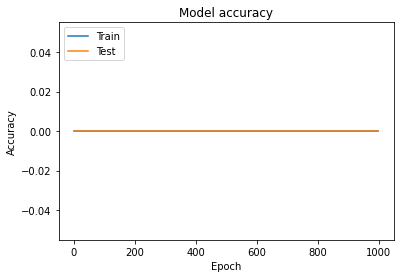

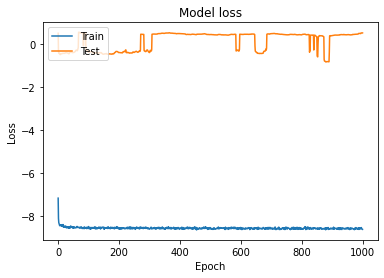

1309/1309 [==============================] - 0s 21us/step
Test score: -8.483916279056585
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


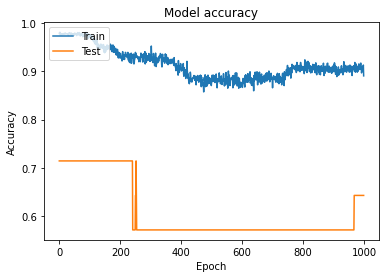

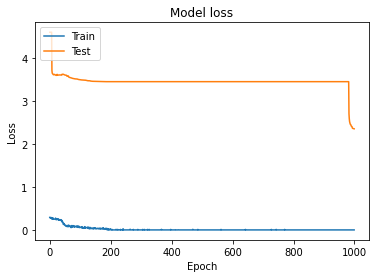

1309/1309 [==============================] - 0s 17us/step
Test score: 0.02519098423060381
Test accuracy: 0.9549274444580078
This los wil be testet:
poisson


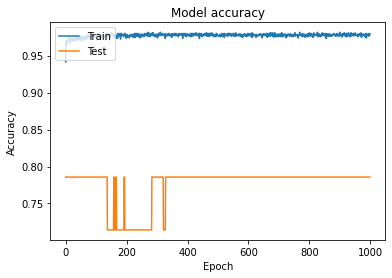

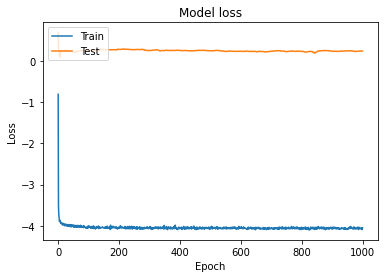

1309/1309 [==============================] - 0s 19us/step
Test score: -4.044345827310754
Test accuracy: 0.976317822933197
This los wil be testet:
cosine_proximity


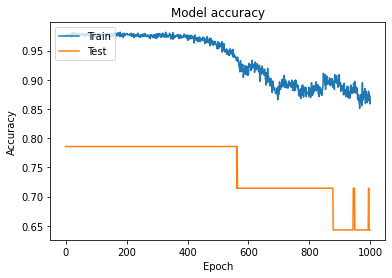

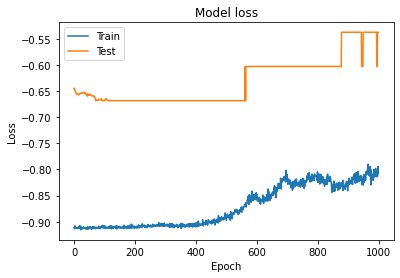

1309/1309 [==============================] - 0s 21us/step
Test score: -0.8212649751201306
Test accuracy: 0.8823529481887817
This optimizer wil be testet:
<class 'keras.optimizers.Nadam'>
This los wil be testet:
mean_squared_error


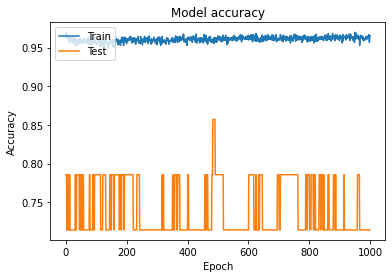

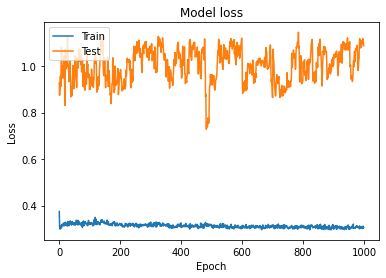

1309/1309 [==============================] - 0s 20us/step
Test score: 0.29790828535809966
Test accuracy: 0.9610389471054077
This los wil be testet:
mean_absolute_error


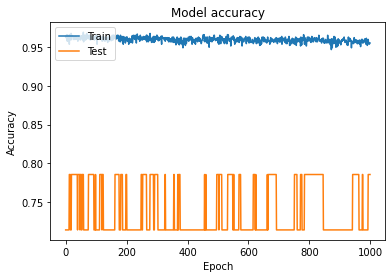

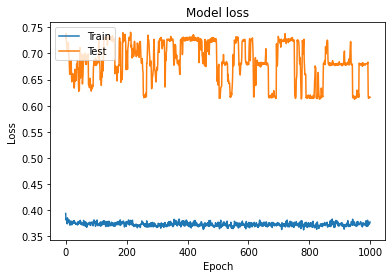

1309/1309 [==============================] - 0s 24us/step
Test score: 0.362401971569309
Test accuracy: 0.9595111012458801
This los wil be testet:
mean_absolute_percentage_error


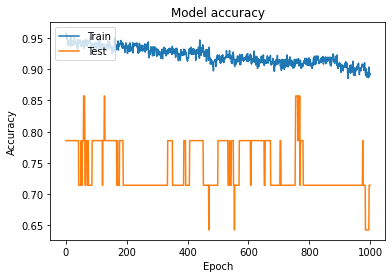

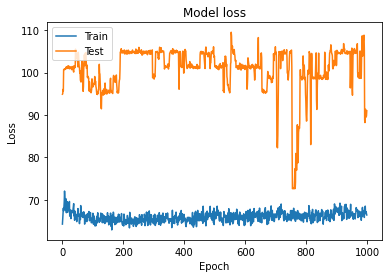

1309/1309 [==============================] - 0s 23us/step
Test score: 62.431281967687646
Test accuracy: 0.9075630307197571
This los wil be testet:
mean_squared_logarithmic_error


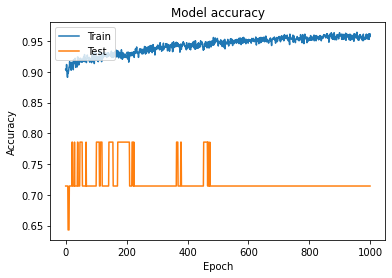

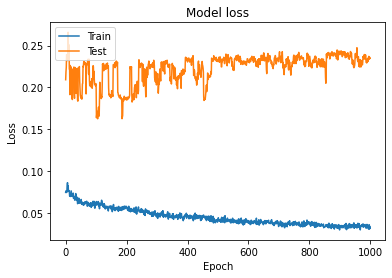

1309/1309 [==============================] - 0s 24us/step
Test score: 0.028175065840321974
Test accuracy: 0.9640947580337524
This los wil be testet:
squared_hinge


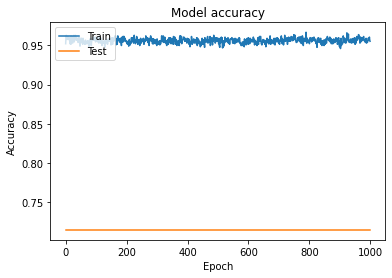

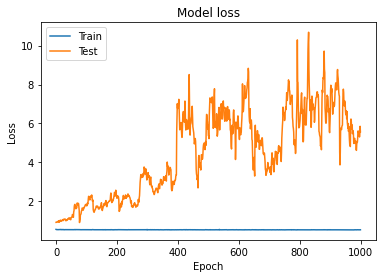

1309/1309 [==============================] - 0s 24us/step
Test score: 0.5805455334228445
Test accuracy: 0.9610389471054077
This los wil be testet:
hinge


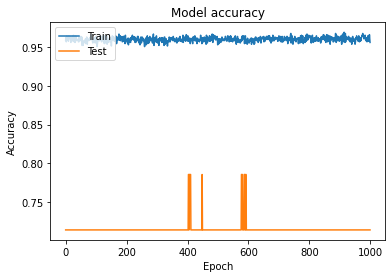

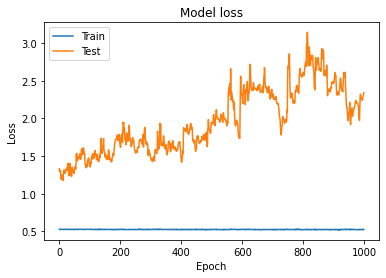

1309/1309 [==============================] - 0s 23us/step
Test score: 0.5390422098321529
Test accuracy: 0.9648586511611938
This los wil be testet:
categorical_hinge


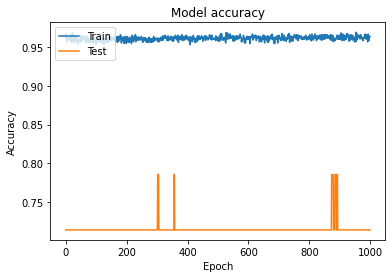

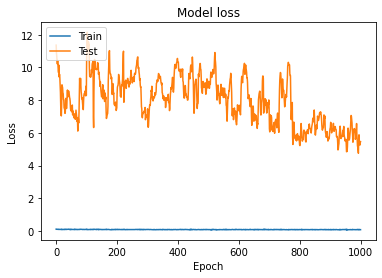

1309/1309 [==============================] - 0s 17us/step
Test score: 0.1256134301264656
Test accuracy: 0.9648586511611938
This los wil be testet:
logcosh


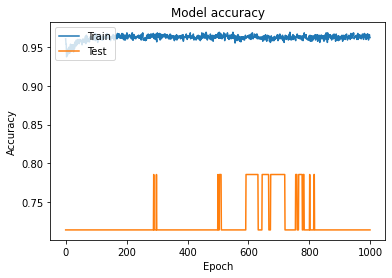

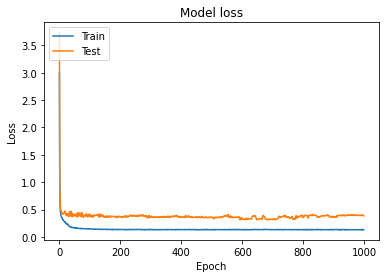

1309/1309 [==============================] - 0s 20us/step
Test score: 0.12824341818701684
Test accuracy: 0.9633308053016663
This los wil be testet:
huber_loss


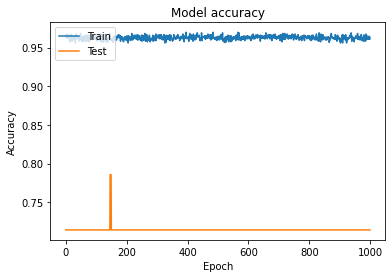

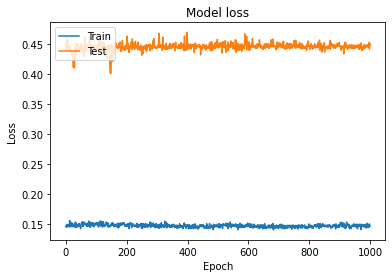

1309/1309 [==============================] - 0s 25us/step
Test score: 0.14459923708866898
Test accuracy: 0.9610389471054077
This los wil be testet:
categorical_crossentropy


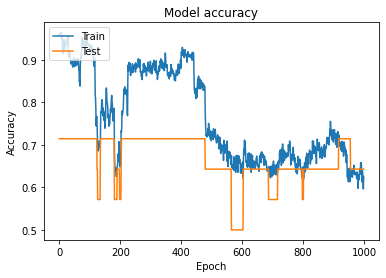

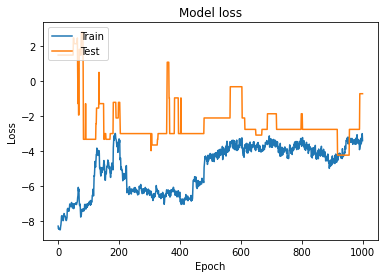

1309/1309 [==============================] - 0s 20us/step
Test score: -3.583497324820417
Test accuracy: 0.6378915309906006
This los wil be testet:
binary_crossentropy


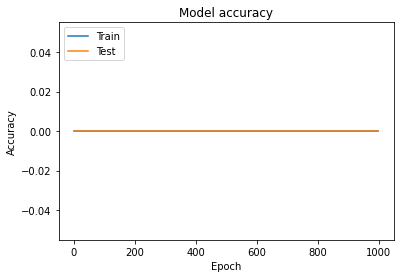

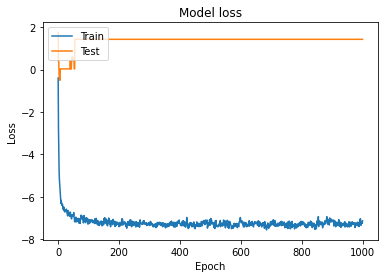

1309/1309 [==============================] - 0s 20us/step
Test score: -7.355613558459956
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


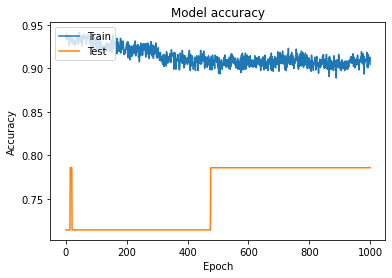

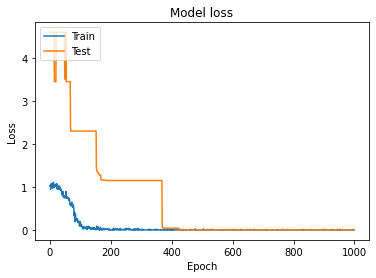

1309/1309 [==============================] - 0s 19us/step
Test score: -1.611809580026602e-06
Test accuracy: 0.9304812550544739
This los wil be testet:
poisson


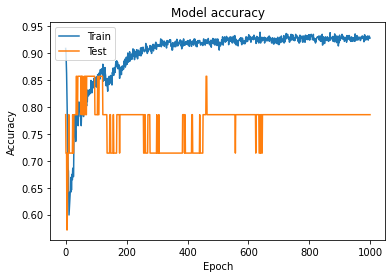

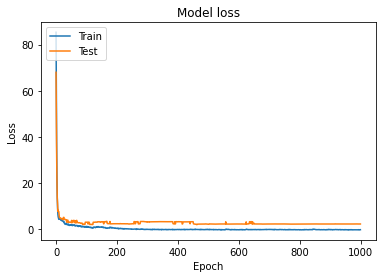

1309/1309 [==============================] - 0s 18us/step
Test score: -0.2598803359374825
Test accuracy: 0.9396485686302185
This los wil be testet:
cosine_proximity


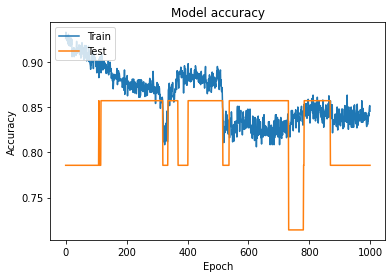

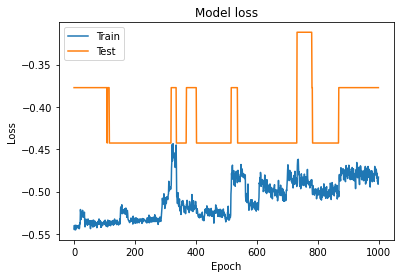

1309/1309 [==============================] - 0s 19us/step
Test score: -0.5242455476244685
Test accuracy: 0.893048107624054
Best test score is: -1.611809580026602e-06
Best test acc is: 0.5210084319114685
Best optimization methode is:<class 'keras.optimizers.RMSprop'>Best los is:kullback_leibler_divergence


In [90]:
model_list = [optimizers.Adagrad, optimizers.SGD, optimizers.Adam,optimizers.RMSprop,optimizers.Adadelta,optimizers.Adamax,optimizers.Nadam]
scoreBest = 0
accBest = 0
trainLossBest = 100000
testLossBest = 100000
trainDiffBest = 1000000

nameLossBest = ""
nameOptimBest = ""

for optimization_method in model_list:
    print("This optimizer wil be testet:")
    print(optimization_method)
    for los in los_list:
        print("This los wil be testet:")
        print(los)
        model.compile(loss=los,optimizer = optimization_method(),metrics = ['accuracy'])
        history = model.fit(trainSet, Ycombined, validation_split=0.01, epochs=1000, batch_size=100, verbose=0)
        
        plot_accuracyhistory(history)
        plot_loss(history)
        score, acc = model.evaluate(trainSet, Ycombined,batch_size=100)
        print('Test score:', score)
        print('Test accuracy:', acc)
        trainLoss = (history.history['loss'])
        testLoss = (history.history['val_loss'])
        '''
        if score > scoreBest:
            scoreBest = score
        if  acc > accBest:
            accBest = acc
        '''

        trainDiff = abs(testLoss[-1] - trainLoss[-1])
        
        if  trainDiff < trainDiffBest:
            scoreBest = score
            accBest = acc
            trainDiffBest = trainDiff
            nameLossBest = los
            nameOptimBest = optimization_method
            model.save_weights("bestTitanicV1.h5")
        

print('Best test score is:', scoreBest)
print('Best test acc is:', accBest)
print("Best optimization methode is:" + str(nameOptimBest) + "Best los is:" + str(nameLossBest))
    

In [0]:
model = Sequential() 
model.add(Dense(1485, input_dim=27, activation='relu',kernel_initializer=initializers.random_normal(stddev=0.01)))
model.add(Dense(891, activation='relu',kernel_initializer=initializers.random_normal(stddev=0.01)))
model.add(Dense(2, activation='relu',kernel_initializer=initializers.random_normal(stddev=0.01)))

In [92]:
#Visualizing the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1485)              41580     
_________________________________________________________________
dense_5 (Dense)              (None, 891)               1324026   
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 1784      
Total params: 1,367,390
Trainable params: 1,367,390
Non-trainable params: 0
_________________________________________________________________


This optimizer wil be testet:
<class 'keras.optimizers.Adagrad'>
This los wil be testet:
mean_squared_error


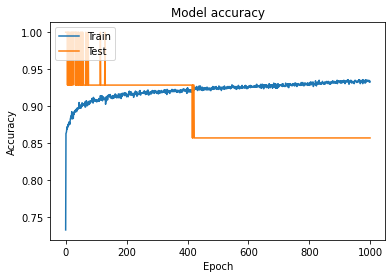

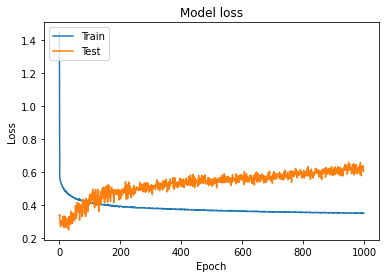

1309/1309 [==============================] - 0s 21us/step
Test score: 0.3495734310314071
Test accuracy: 0.9350649118423462
This los wil be testet:
mean_absolute_error


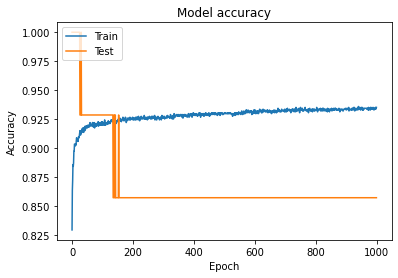

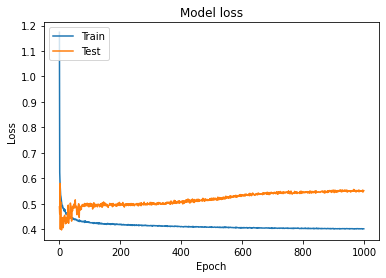

1309/1309 [==============================] - 0s 19us/step
Test score: 0.4017606818375467
Test accuracy: 0.9343010187149048
This los wil be testet:
mean_absolute_percentage_error


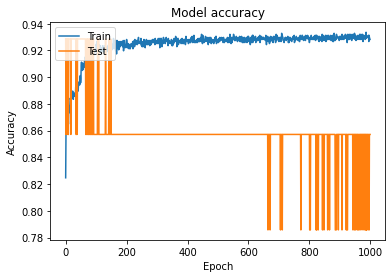

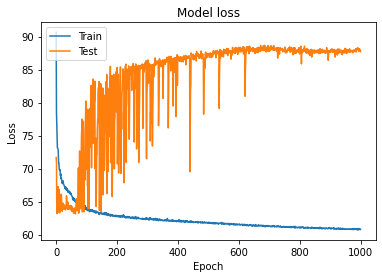

1309/1309 [==============================] - 0s 20us/step
Test score: 61.10442689760119
Test accuracy: 0.9312452077865601
This los wil be testet:
mean_squared_logarithmic_error


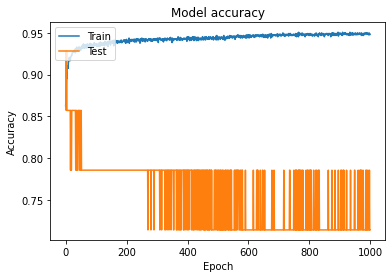

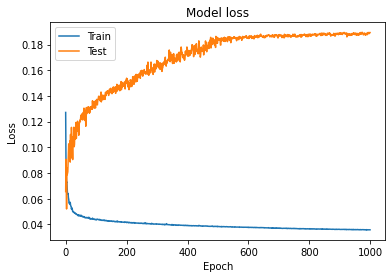

1309/1309 [==============================] - 0s 20us/step
Test score: 0.03668358489142473
Test accuracy: 0.9465240836143494
This los wil be testet:
squared_hinge


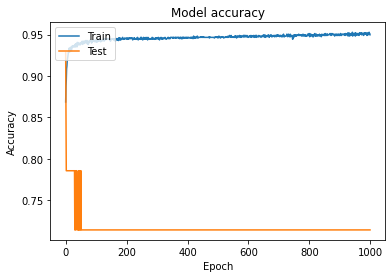

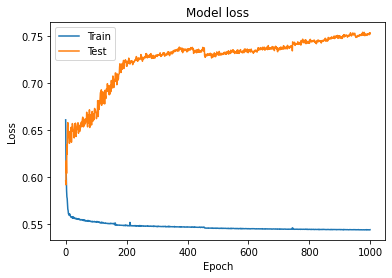

1309/1309 [==============================] - 0s 24us/step
Test score: 0.546037728591581
Test accuracy: 0.9503437876701355
This los wil be testet:
hinge


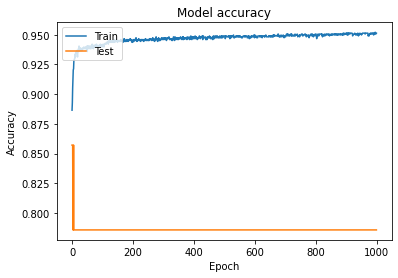

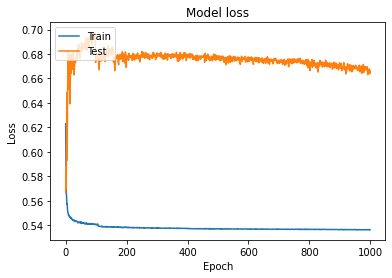

1309/1309 [==============================] - 0s 22us/step
Test score: 0.5376546285915593
Test accuracy: 0.9495798349380493
This los wil be testet:
categorical_hinge


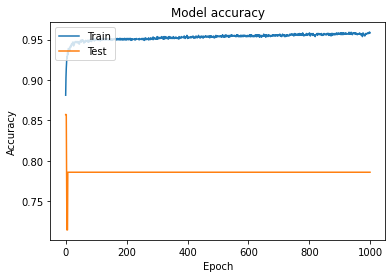

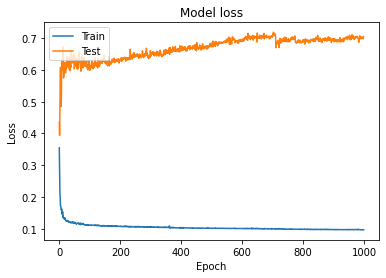

1309/1309 [==============================] - 0s 19us/step
Test score: 0.10268521214414864
Test accuracy: 0.9564552903175354
This los wil be testet:
logcosh


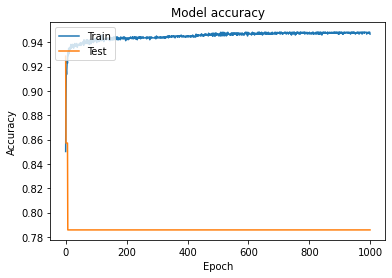

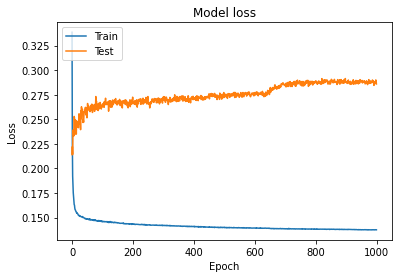

1309/1309 [==============================] - 0s 18us/step
Test score: 0.1385656452137974
Test accuracy: 0.9465240836143494
This los wil be testet:
huber_loss


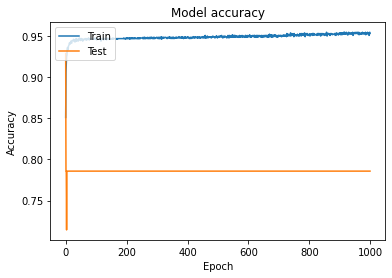

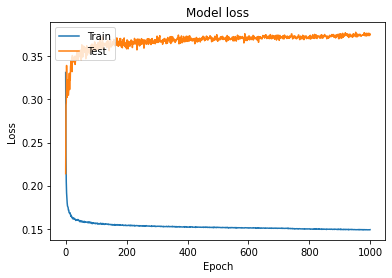

1309/1309 [==============================] - 0s 22us/step
Test score: 0.1501716830695832
Test accuracy: 0.9518716335296631
This los wil be testet:
categorical_crossentropy


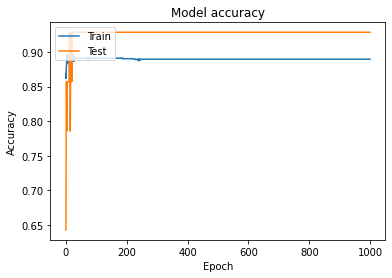

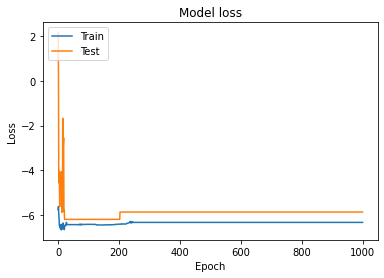

1309/1309 [==============================] - 0s 18us/step
Test score: -6.3209884496387225
Test accuracy: 0.889992356300354
This los wil be testet:
binary_crossentropy


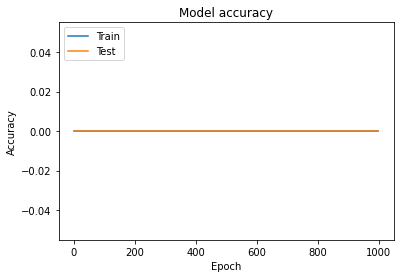

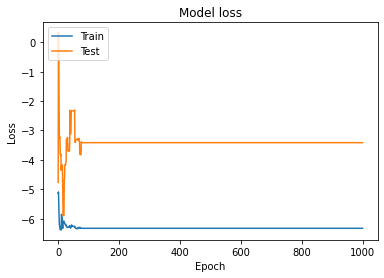

1309/1309 [==============================] - 0s 19us/step
Test score: -6.276971351517531
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


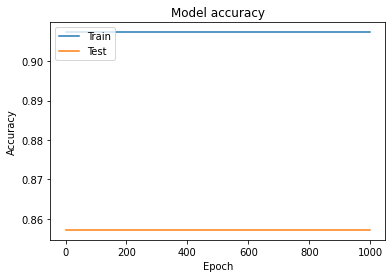

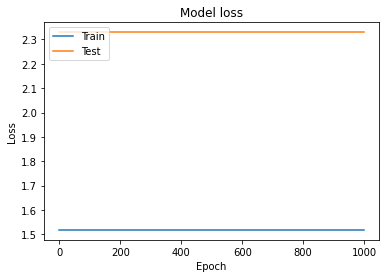

1309/1309 [==============================] - 0s 15us/step
Test score: 1.5271331343217842
Test accuracy: 0.9067990779876709
This los wil be testet:
poisson


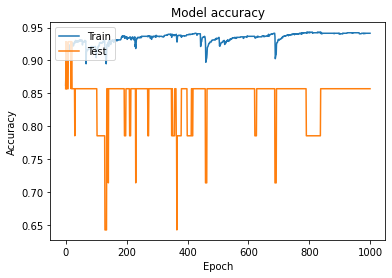

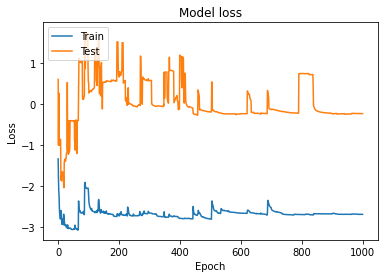

1309/1309 [==============================] - 0s 16us/step
Test score: -2.6625317671173305
Test accuracy: 0.9404125213623047
This los wil be testet:
cosine_proximity


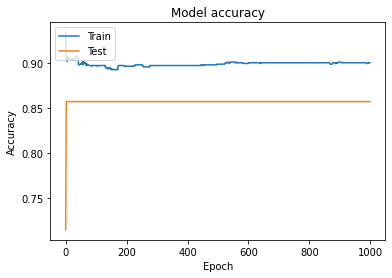

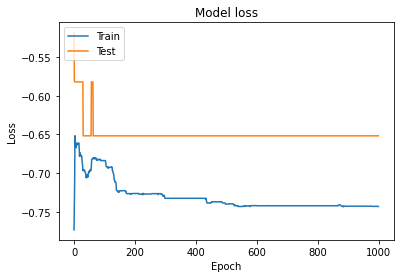

1309/1309 [==============================] - 0s 18us/step
Test score: -0.7421641785102185
Test accuracy: 0.8999236226081848
This optimizer wil be testet:
<class 'keras.optimizers.SGD'>
This los wil be testet:
mean_squared_error


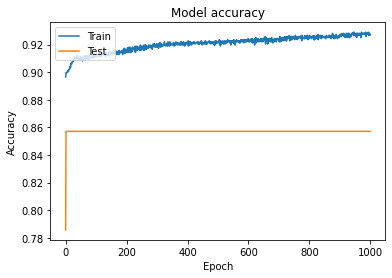

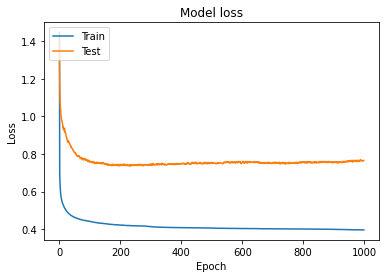

1309/1309 [==============================] - 0s 18us/step
Test score: 0.39925195503271294
Test accuracy: 0.9281894564628601
This los wil be testet:
mean_absolute_error


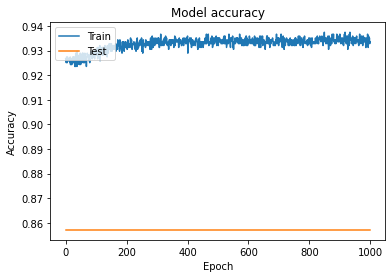

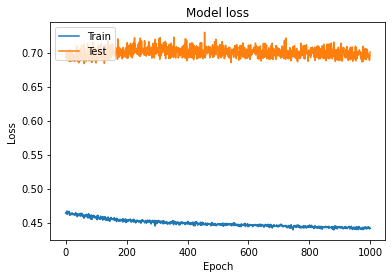

1309/1309 [==============================] - 0s 19us/step
Test score: 0.44857779361529604
Test accuracy: 0.9281894564628601
This los wil be testet:
mean_absolute_percentage_error


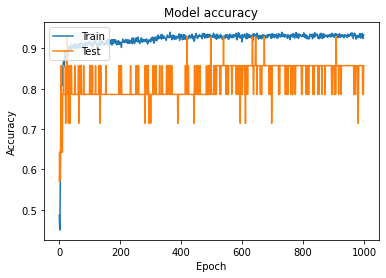

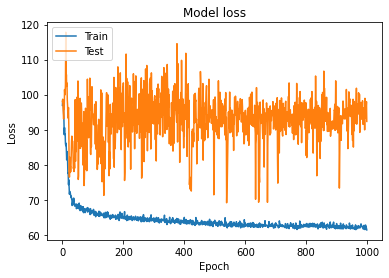

1309/1309 [==============================] - 0s 22us/step
Test score: 61.554293685691604
Test accuracy: 0.9335370659828186
This los wil be testet:
mean_squared_logarithmic_error


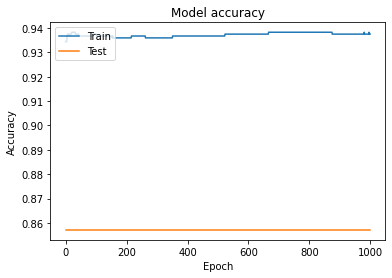

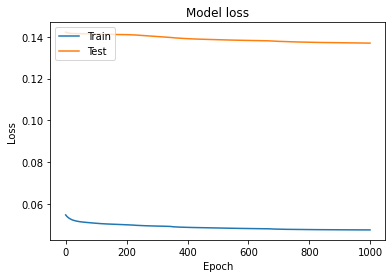

1309/1309 [==============================] - 0s 18us/step
Test score: 0.04858399993641127
Test accuracy: 0.9365928173065186
This los wil be testet:
squared_hinge


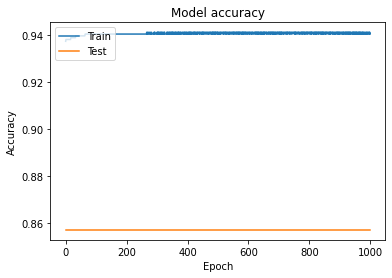

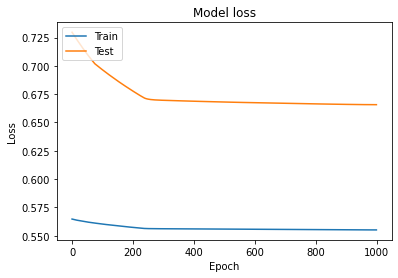

1309/1309 [==============================] - 0s 25us/step
Test score: 0.5563262120014479
Test accuracy: 0.9404125213623047
This los wil be testet:
hinge


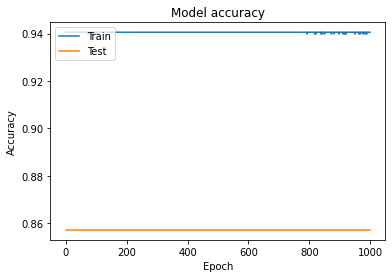

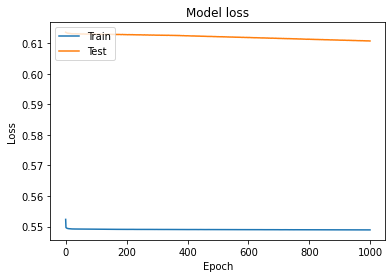

1309/1309 [==============================] - 0s 21us/step
Test score: 0.5495799082303612
Test accuracy: 0.9396485686302185
This los wil be testet:
categorical_hinge


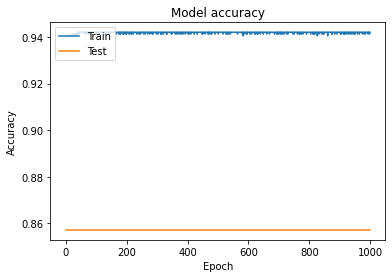

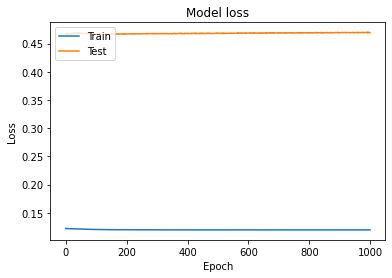

1309/1309 [==============================] - 0s 19us/step
Test score: 0.123146857386149
Test accuracy: 0.9411764740943909
This los wil be testet:
logcosh


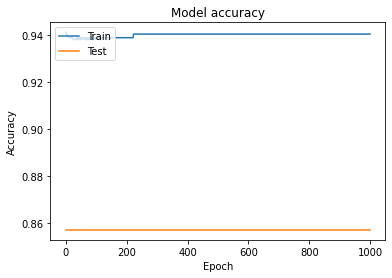

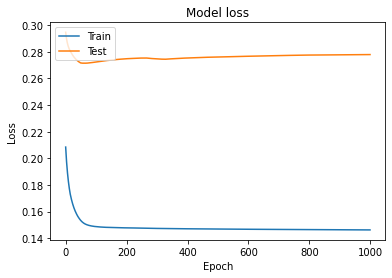

1309/1309 [==============================] - 0s 20us/step
Test score: 0.14758659203695468
Test accuracy: 0.9396485686302185
This los wil be testet:
huber_loss


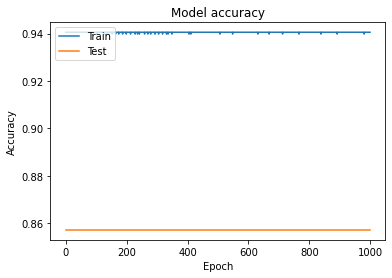

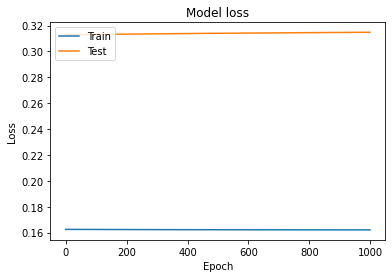

1309/1309 [==============================] - 0s 18us/step
Test score: 0.1637276162893559
Test accuracy: 0.9396485686302185
This los wil be testet:
categorical_crossentropy


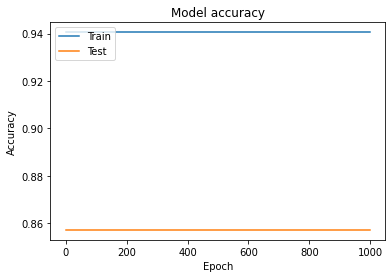

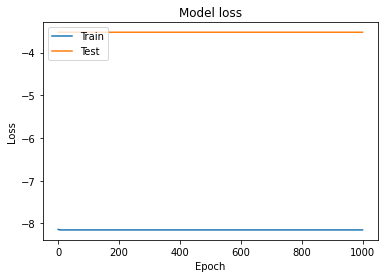

1309/1309 [==============================] - 0s 18us/step
Test score: -8.103843530095014
Test accuracy: 0.9396485686302185
This los wil be testet:
binary_crossentropy


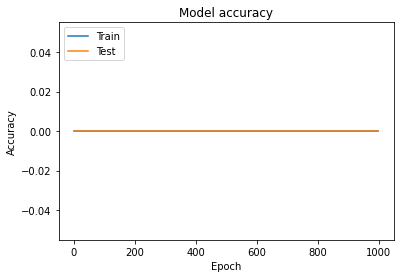

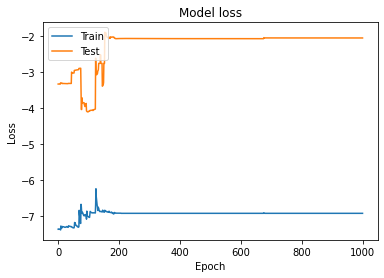

1309/1309 [==============================] - 0s 17us/step
Test score: -6.858119552284821
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


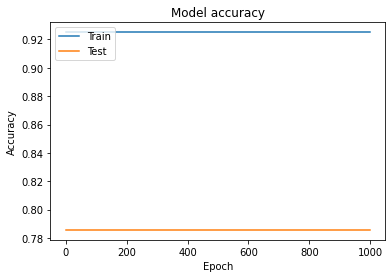

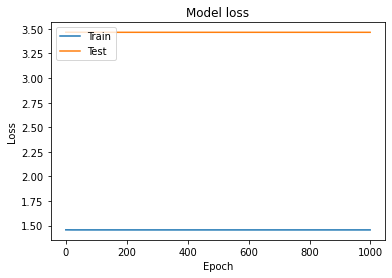

1309/1309 [==============================] - 0s 14us/step
Test score: 1.4777170702006819
Test accuracy: 0.9236057996749878
This los wil be testet:
poisson


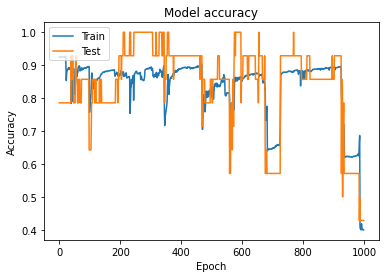

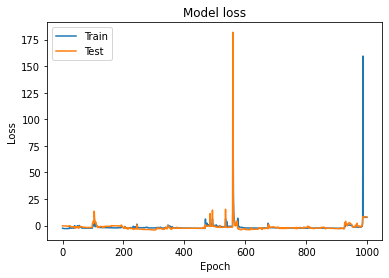

1309/1309 [==============================] - 0s 19us/step
Test score: 7.7288500973065455
Test accuracy: 0.4003055691719055
This los wil be testet:
cosine_proximity


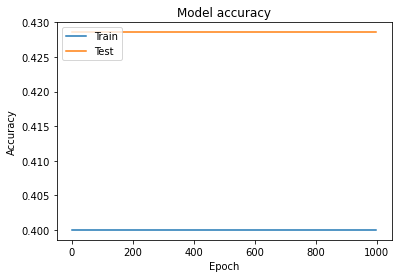

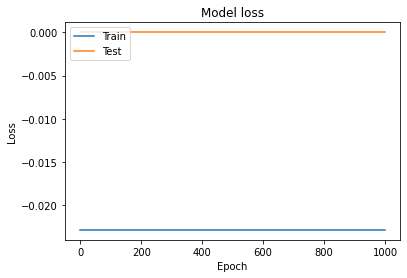

1309/1309 [==============================] - 0s 17us/step
Test score: -0.02259881384357685
Test accuracy: 0.4003055691719055
This optimizer wil be testet:
<class 'keras.optimizers.Adam'>
This los wil be testet:
mean_squared_error


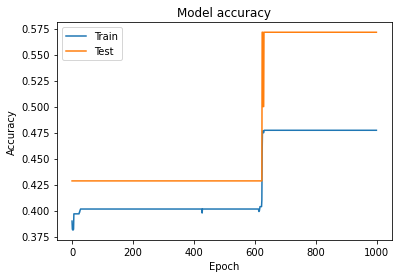

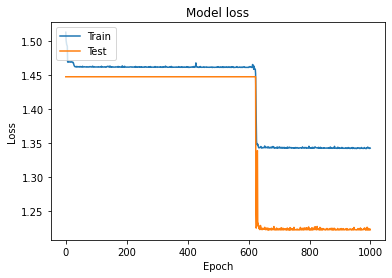

1309/1309 [==============================] - 0s 16us/step
Test score: 1.3405041472888157
Test accuracy: 0.4782276451587677
This los wil be testet:
mean_absolute_error


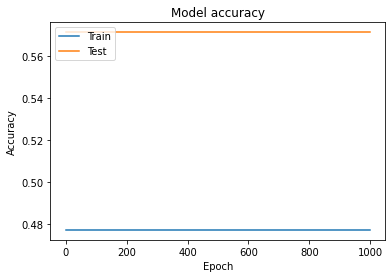

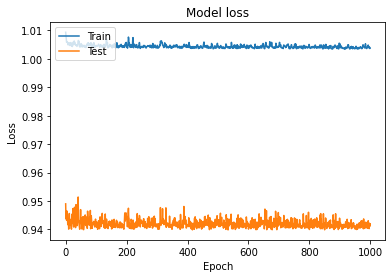

1309/1309 [==============================] - 0s 27us/step
Test score: 1.0025854215447096
Test accuracy: 0.4782276451587677
This los wil be testet:
mean_absolute_percentage_error


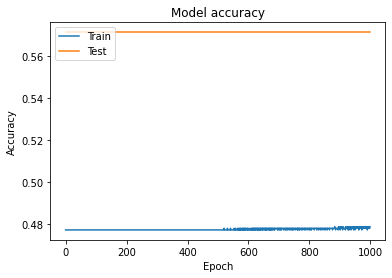

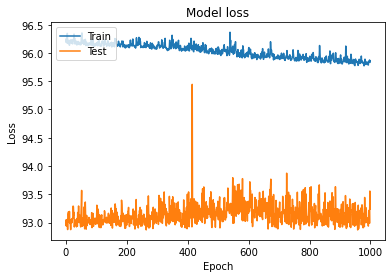

1309/1309 [==============================] - 0s 20us/step
Test score: 95.7709992410938
Test accuracy: 0.47975555062294006
This los wil be testet:
mean_squared_logarithmic_error


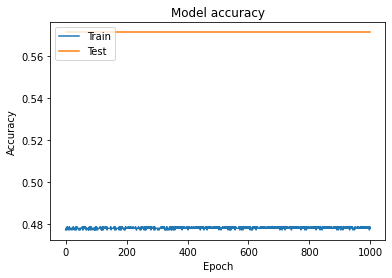

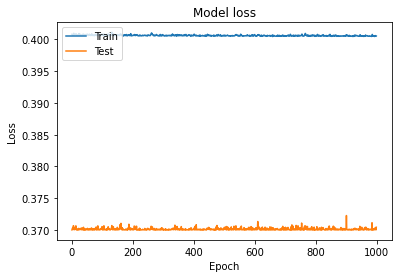

1309/1309 [==============================] - 0s 20us/step
Test score: 0.4001549795850531
Test accuracy: 0.47975555062294006
This los wil be testet:
squared_hinge


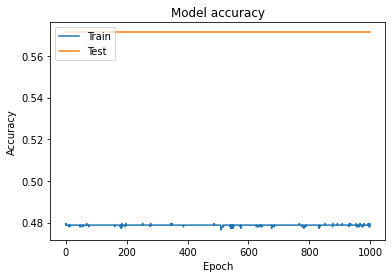

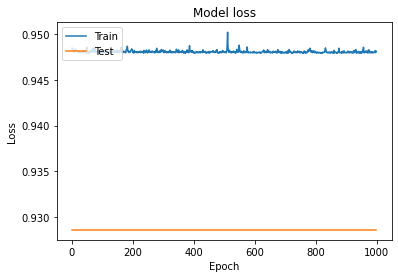

1309/1309 [==============================] - 0s 20us/step
Test score: 0.9478190060423202
Test accuracy: 0.47975555062294006
This los wil be testet:
hinge


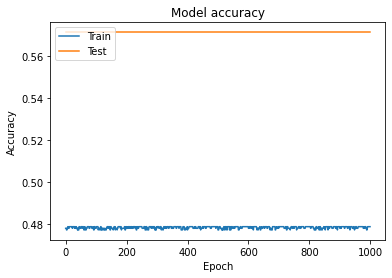

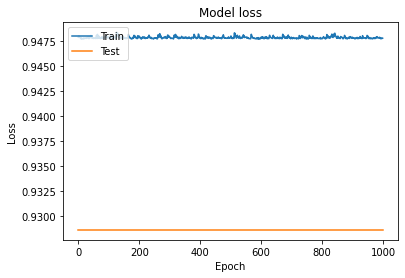

1309/1309 [==============================] - 0s 22us/step
Test score: 0.9477103653074312
Test accuracy: 0.4789915978908539
This los wil be testet:
categorical_hinge


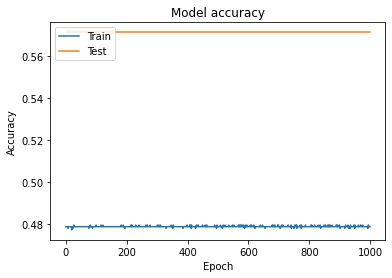

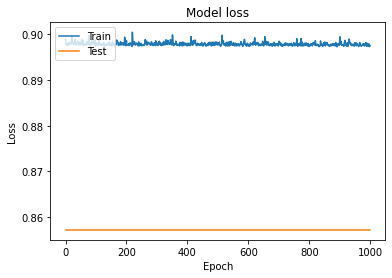

1309/1309 [==============================] - 0s 19us/step
Test score: 0.8970272829734797
Test accuracy: 0.47975555062294006
This los wil be testet:
logcosh


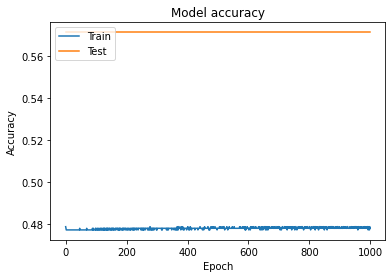

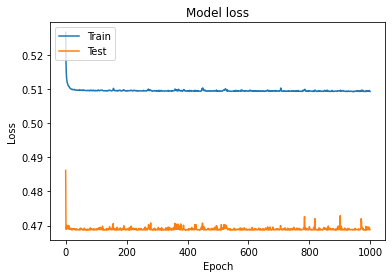

1309/1309 [==============================] - 0s 20us/step
Test score: 0.5089009014862562
Test accuracy: 0.47975555062294006
This los wil be testet:
huber_loss


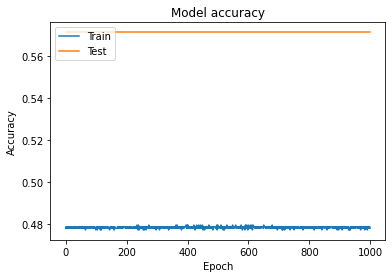

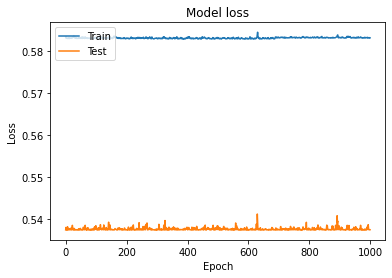

1309/1309 [==============================] - 0s 20us/step
Test score: 0.5827025276636513
Test accuracy: 0.47975555062294006
This los wil be testet:
categorical_crossentropy


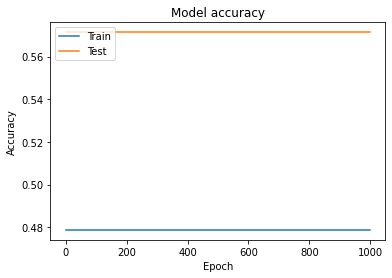

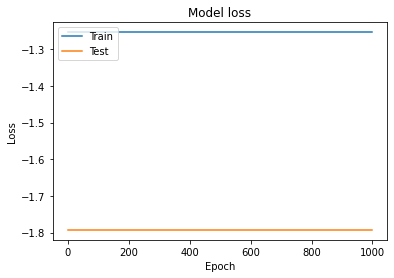

1309/1309 [==============================] - 0s 19us/step
Test score: -1.2596698628754175
Test accuracy: 0.47975555062294006
This los wil be testet:
binary_crossentropy


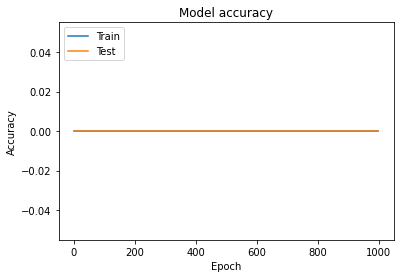

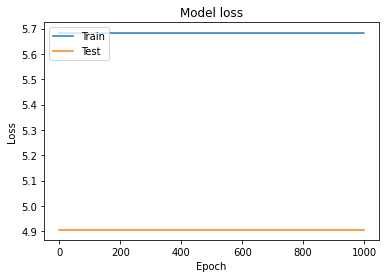

1309/1309 [==============================] - 0s 18us/step
Test score: 5.677194768367968
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


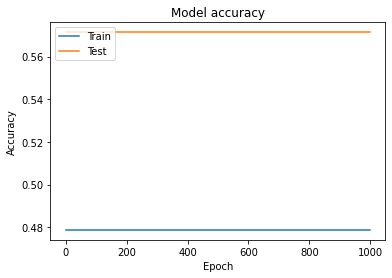

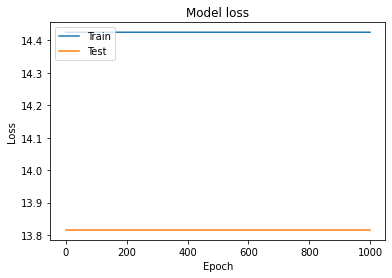

1309/1309 [==============================] - 0s 15us/step
Test score: 14.418861529042104
Test accuracy: 0.47975555062294006
This los wil be testet:
poisson


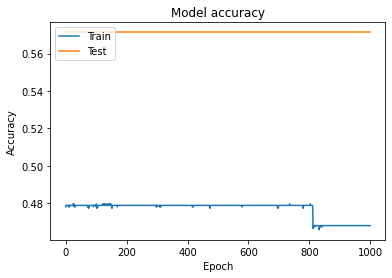

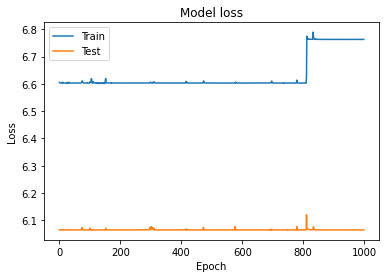

1309/1309 [==============================] - 0s 19us/step
Test score: 6.755021442795091
Test accuracy: 0.46906036138534546
This los wil be testet:
cosine_proximity


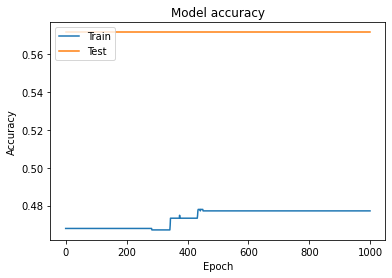

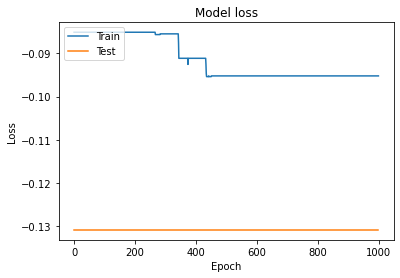

1309/1309 [==============================] - 0s 19us/step
Test score: -0.09558528026521798
Test accuracy: 0.4782276451587677
This optimizer wil be testet:
<class 'keras.optimizers.RMSprop'>
This los wil be testet:
mean_squared_error


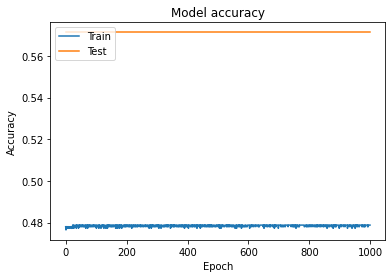

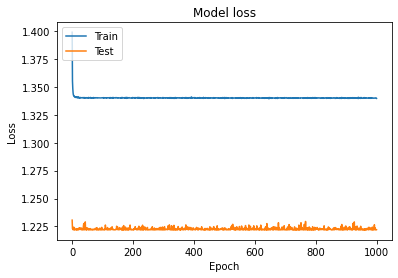

1309/1309 [==============================] - 0s 16us/step
Test score: 1.3382526956231109
Test accuracy: 0.47975555062294006
This los wil be testet:
mean_absolute_error


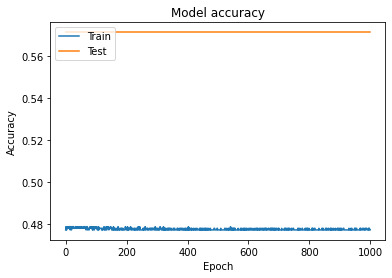

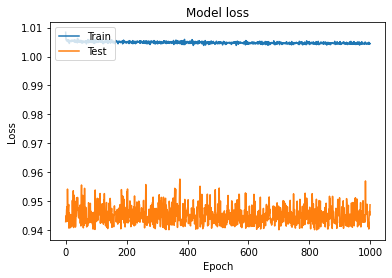

1309/1309 [==============================] - 0s 20us/step
Test score: 1.0050615773026137
Test accuracy: 0.4782276451587677
This los wil be testet:
mean_absolute_percentage_error


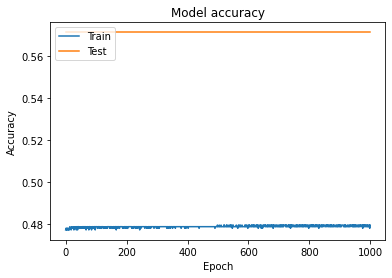

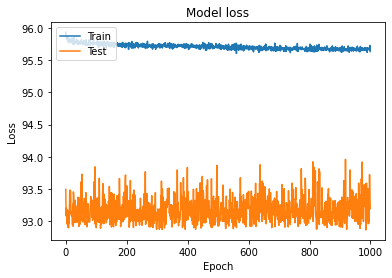

1309/1309 [==============================] - 0s 23us/step
Test score: 95.56920181985481
Test accuracy: 0.48051947355270386
This los wil be testet:
mean_squared_logarithmic_error


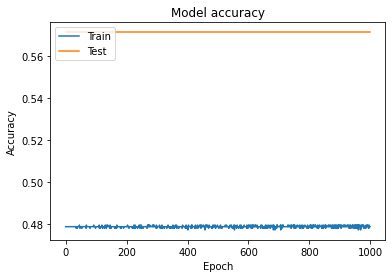

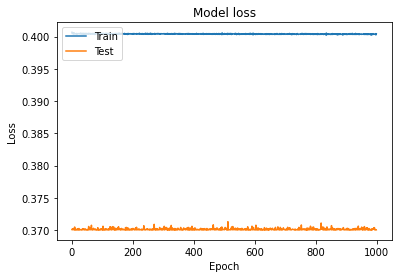

1309/1309 [==============================] - 0s 20us/step
Test score: 0.3999342186429102
Test accuracy: 0.48051947355270386
This los wil be testet:
squared_hinge


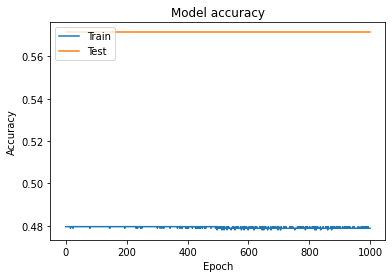

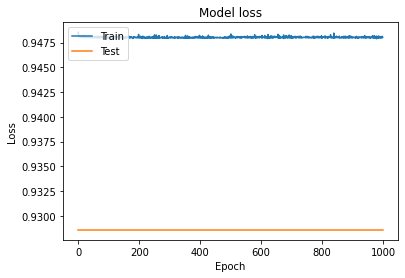

1309/1309 [==============================] - 0s 22us/step
Test score: 0.9478283907002943
Test accuracy: 0.47975555062294006
This los wil be testet:
hinge


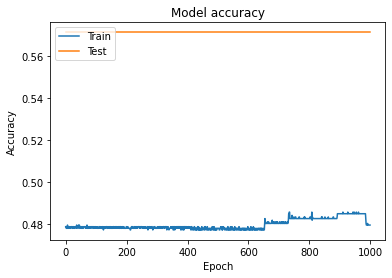

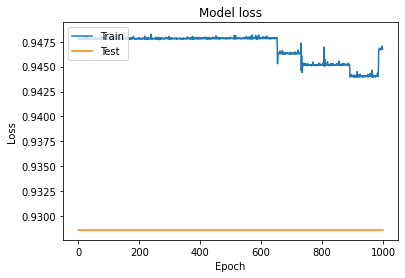

1309/1309 [==============================] - 0s 24us/step
Test score: 0.9465553147179011
Test accuracy: 0.48051947355270386
This los wil be testet:
categorical_hinge


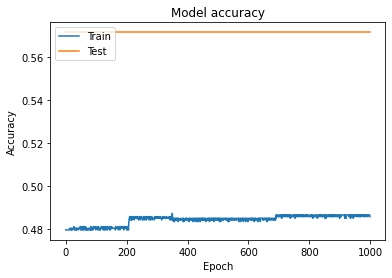

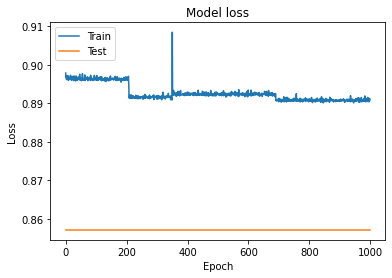

1309/1309 [==============================] - 0s 16us/step
Test score: 0.8897773318840767
Test accuracy: 0.48739495873451233
This los wil be testet:
logcosh


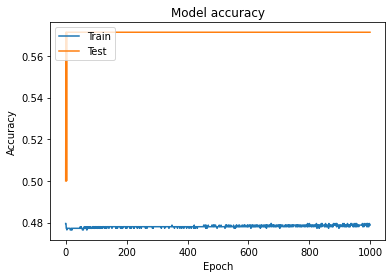

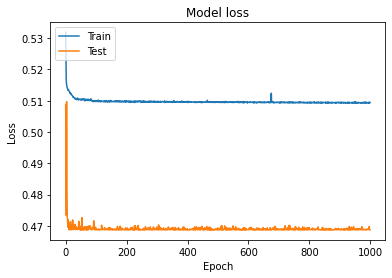

1309/1309 [==============================] - 0s 17us/step
Test score: 0.5087715042875959
Test accuracy: 0.47975555062294006
This los wil be testet:
huber_loss


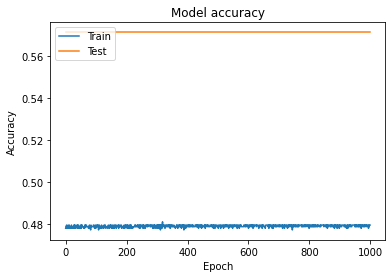

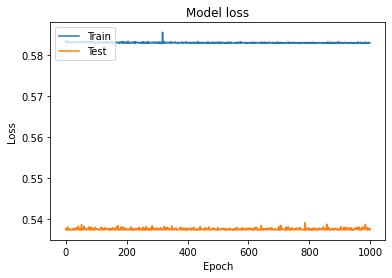

1309/1309 [==============================] - 0s 18us/step
Test score: 0.5823709037897694
Test accuracy: 0.47975555062294006
This los wil be testet:
categorical_crossentropy


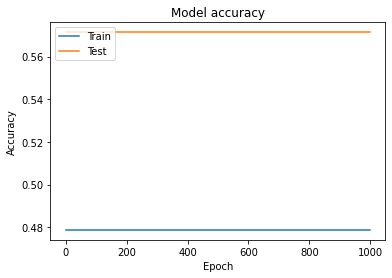

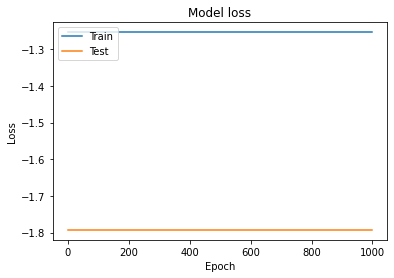

1309/1309 [==============================] - 0s 18us/step
Test score: -1.2596698628754175
Test accuracy: 0.47975555062294006
This los wil be testet:
binary_crossentropy


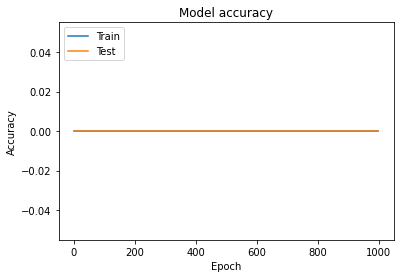

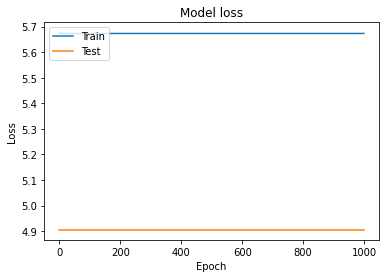

1309/1309 [==============================] - 0s 19us/step
Test score: 5.668037272847455
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


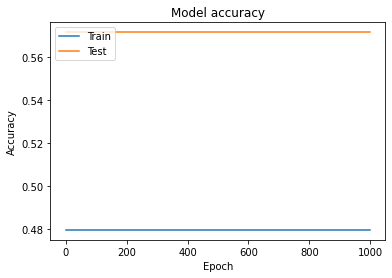

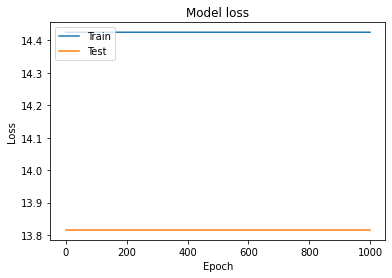

1309/1309 [==============================] - 0s 15us/step
Test score: 14.418861529042104
Test accuracy: 0.48051947355270386
This los wil be testet:
poisson


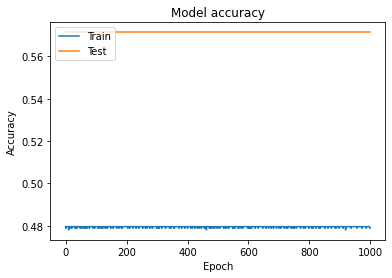

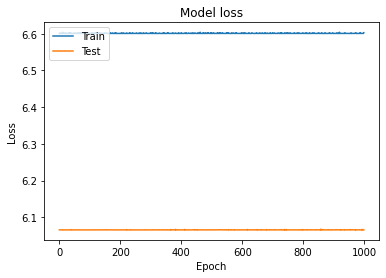

1309/1309 [==============================] - 0s 21us/step
Test score: 6.595710688096316
Test accuracy: 0.48051947355270386
This los wil be testet:
cosine_proximity


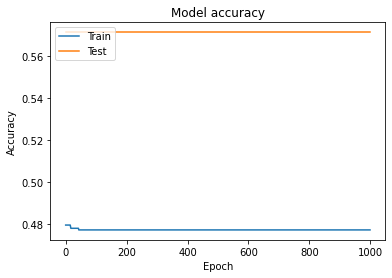

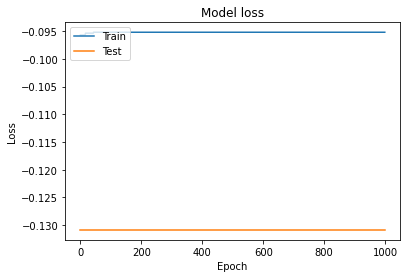

1309/1309 [==============================] - 0s 20us/step
Test score: -0.09558527798849357
Test accuracy: 0.4782276451587677
This optimizer wil be testet:
<class 'keras.optimizers.Adadelta'>
This los wil be testet:
mean_squared_error


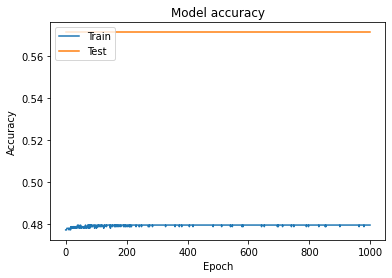

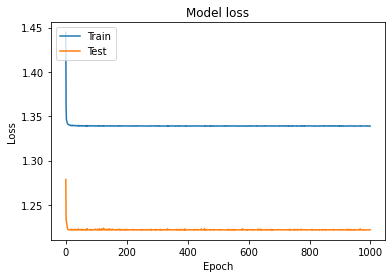

1309/1309 [==============================] - 0s 18us/step
Test score: 1.337591919305217
Test accuracy: 0.48051947355270386
This los wil be testet:
mean_absolute_error


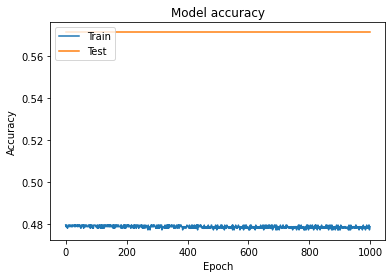

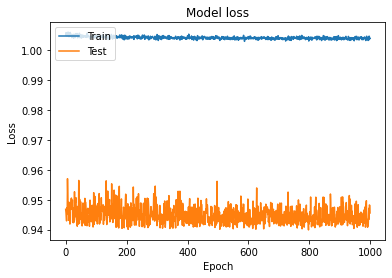

1309/1309 [==============================] - 0s 16us/step
Test score: 1.0053477232651096
Test accuracy: 0.48051947355270386
This los wil be testet:
mean_absolute_percentage_error


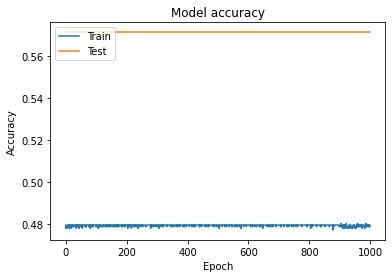

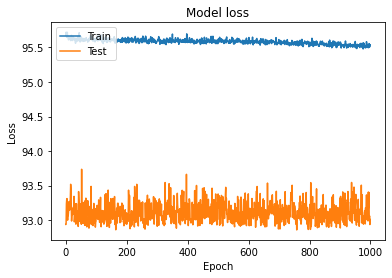

1309/1309 [==============================] - 0s 20us/step
Test score: 95.45468344225785
Test accuracy: 0.47975555062294006
This los wil be testet:
mean_squared_logarithmic_error


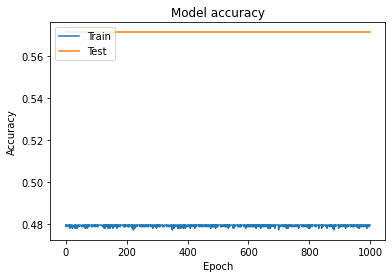

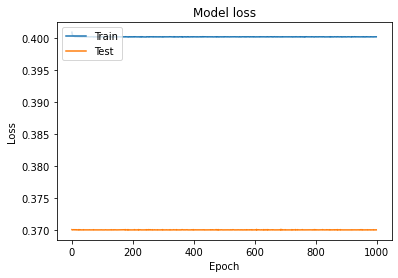

1309/1309 [==============================] - 0s 21us/step
Test score: 0.39989793710439053
Test accuracy: 0.48051947355270386
This los wil be testet:
squared_hinge


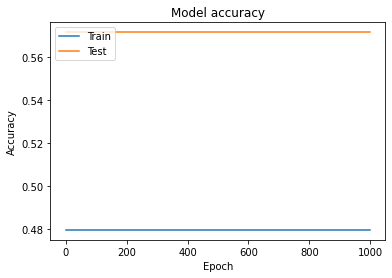

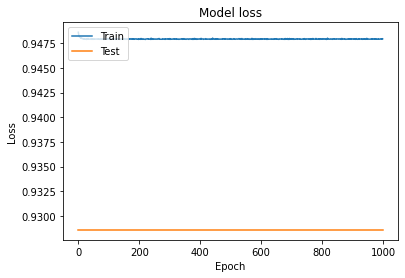

1309/1309 [==============================] - 0s 22us/step
Test score: 0.9477075011881368
Test accuracy: 0.48051947355270386
This los wil be testet:
hinge


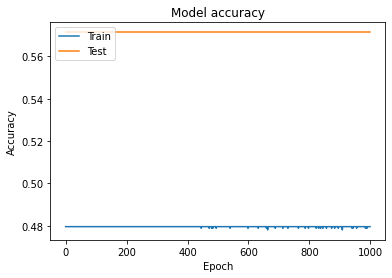

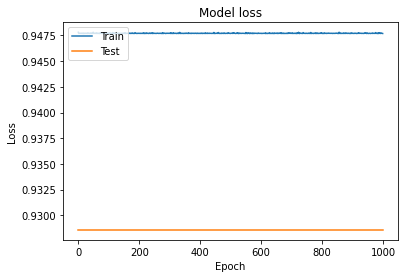

1309/1309 [==============================] - 0s 26us/step
Test score: 0.9475027098284139
Test accuracy: 0.48051947355270386
This los wil be testet:
categorical_hinge


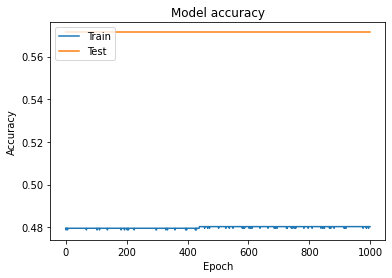

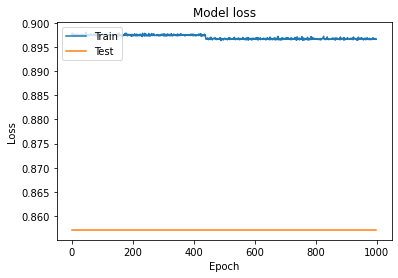

1309/1309 [==============================] - 0s 21us/step
Test score: 0.8961650191417079
Test accuracy: 0.48128342628479004
This los wil be testet:
logcosh


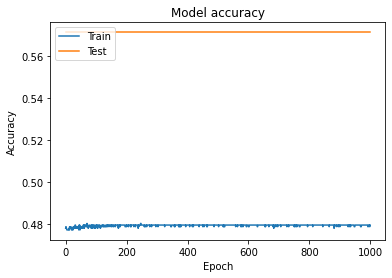

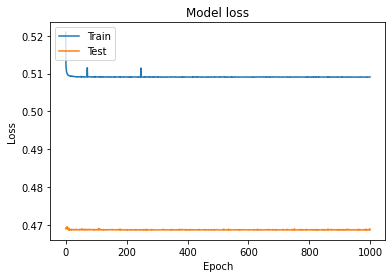

1309/1309 [==============================] - 0s 20us/step
Test score: 0.5085843467275272
Test accuracy: 0.48051947355270386
This los wil be testet:
huber_loss


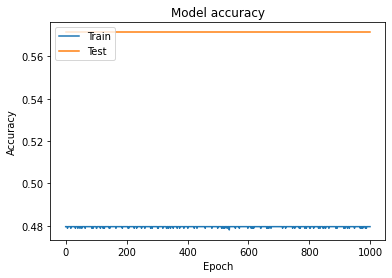

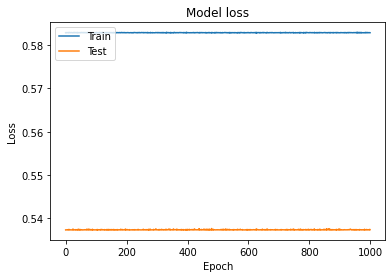

1309/1309 [==============================] - 0s 18us/step
Test score: 0.5823028540684122
Test accuracy: 0.48051947355270386
This los wil be testet:
categorical_crossentropy


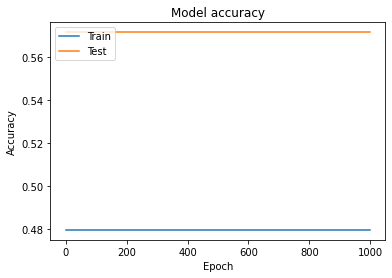

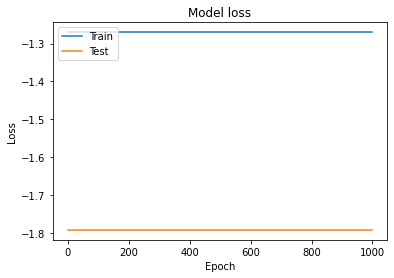

1309/1309 [==============================] - 0s 18us/step
Test score: -1.2754855979208366
Test accuracy: 0.48051947355270386
This los wil be testet:
binary_crossentropy


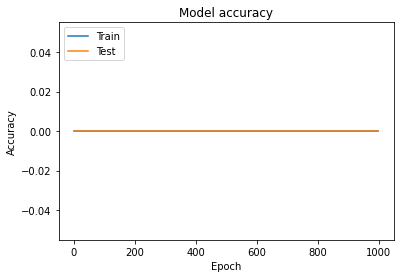

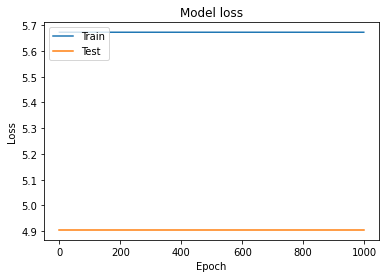

1309/1309 [==============================] - 0s 18us/step
Test score: 5.668037272847455
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


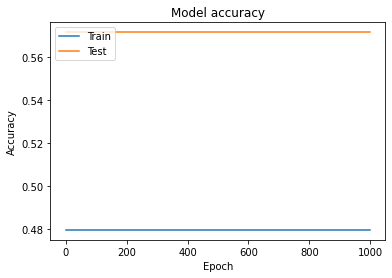

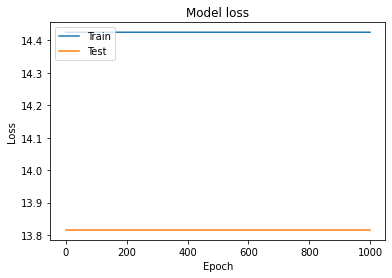

1309/1309 [==============================] - 0s 16us/step
Test score: 14.418861529042104
Test accuracy: 0.48051947355270386
This los wil be testet:
poisson


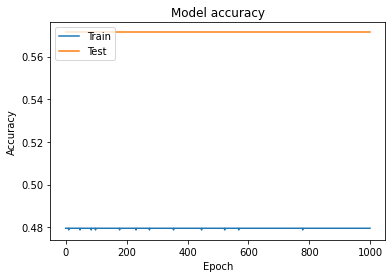

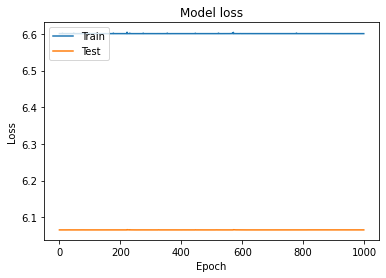

1309/1309 [==============================] - 0s 14us/step
Test score: 6.59513733749448
Test accuracy: 0.48051947355270386
This los wil be testet:
cosine_proximity


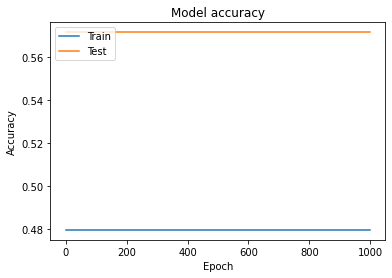

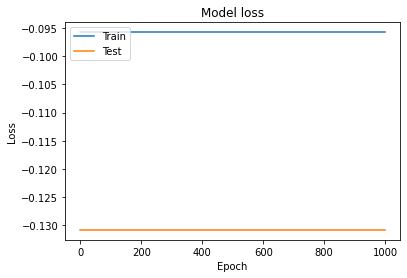

1309/1309 [==============================] - 0s 16us/step
Test score: -0.09608080620024384
Test accuracy: 0.48051947355270386
This optimizer wil be testet:
<class 'keras.optimizers.Adamax'>
This los wil be testet:
mean_squared_error


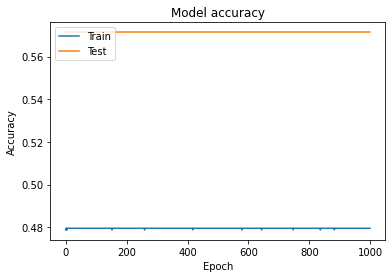

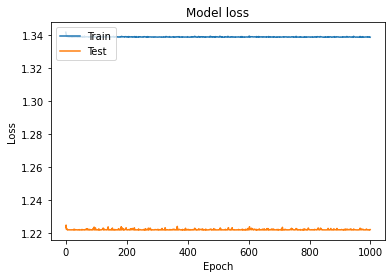

1309/1309 [==============================] - 0s 22us/step
Test score: 1.3374029173934796
Test accuracy: 0.48051947355270386
This los wil be testet:
mean_absolute_error


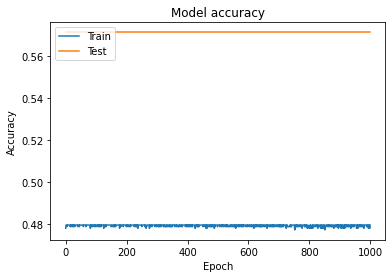

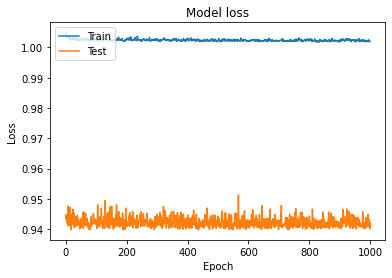

1309/1309 [==============================] - 0s 18us/step
Test score: 1.001319234475004
Test accuracy: 0.4789915978908539
This los wil be testet:
mean_absolute_percentage_error


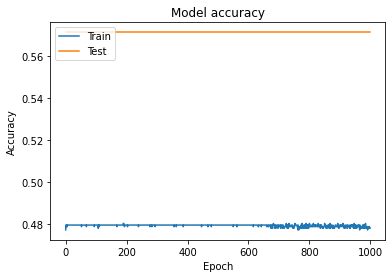

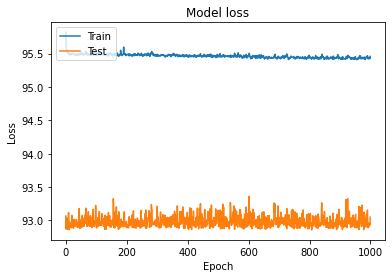

1309/1309 [==============================] - 0s 19us/step
Test score: 95.40498579941787
Test accuracy: 0.47975555062294006
This los wil be testet:
mean_squared_logarithmic_error


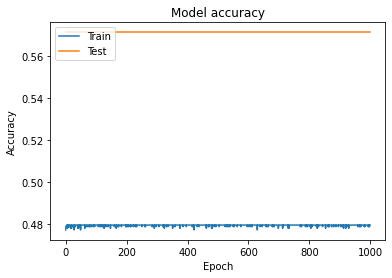

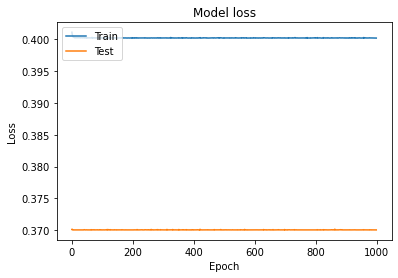

1309/1309 [==============================] - 0s 18us/step
Test score: 0.399877982070375
Test accuracy: 0.48051947355270386
This los wil be testet:
squared_hinge


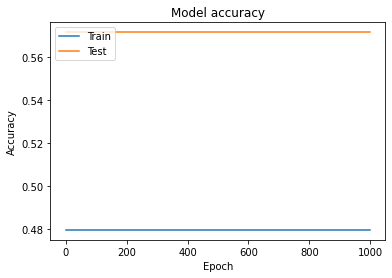

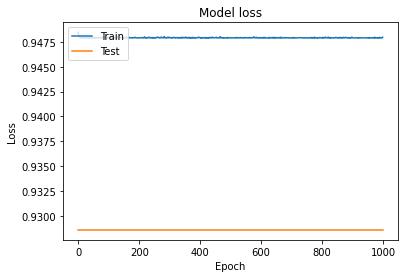

1309/1309 [==============================] - 0s 21us/step
Test score: 0.9477227142605734
Test accuracy: 0.48051947355270386
This los wil be testet:
hinge


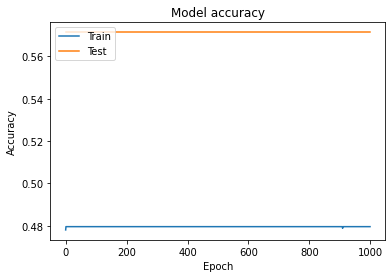

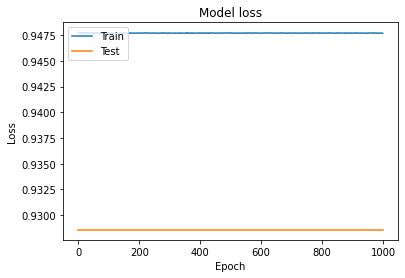

1309/1309 [==============================] - 0s 20us/step
Test score: 0.947485989564425
Test accuracy: 0.48051947355270386
This los wil be testet:
categorical_hinge


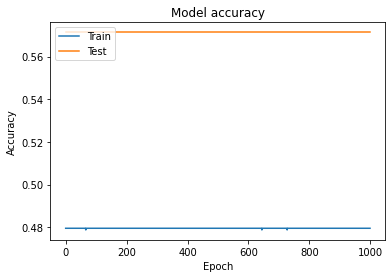

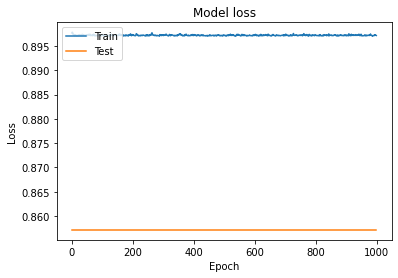

1309/1309 [==============================] - 0s 21us/step
Test score: 0.8966785206696384
Test accuracy: 0.48051947355270386
This los wil be testet:
logcosh


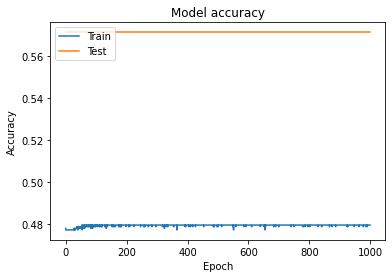

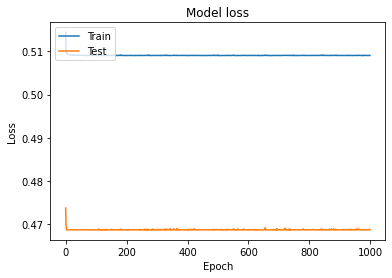

1309/1309 [==============================] - 0s 20us/step
Test score: 0.5085576355366237
Test accuracy: 0.48051947355270386
This los wil be testet:
huber_loss


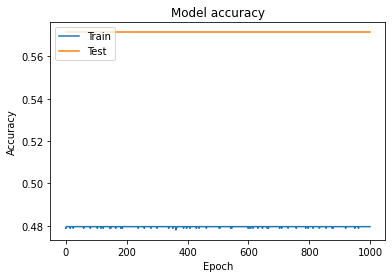

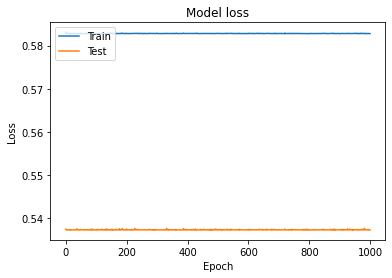

1309/1309 [==============================] - 0s 19us/step
Test score: 0.5822600746446206
Test accuracy: 0.48051947355270386
This los wil be testet:
categorical_crossentropy


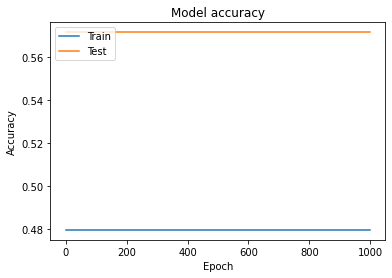

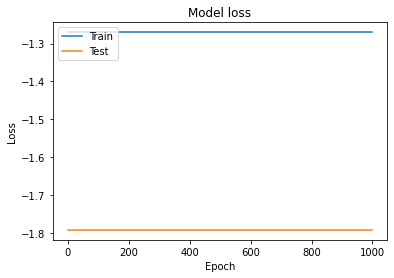

1309/1309 [==============================] - 0s 18us/step
Test score: -1.2754855979208366
Test accuracy: 0.48051947355270386
This los wil be testet:
binary_crossentropy


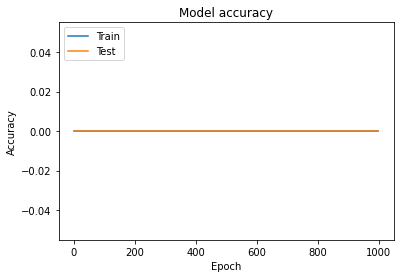

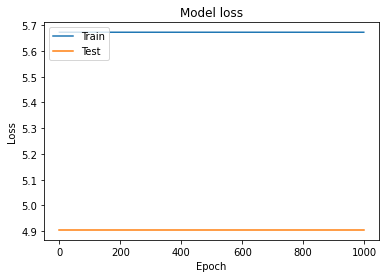

1309/1309 [==============================] - 0s 18us/step
Test score: 5.668037272847455
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


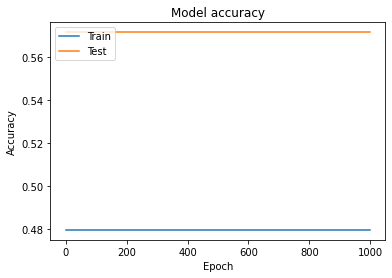

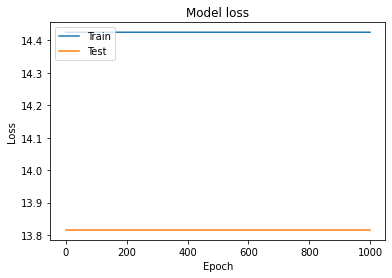

1309/1309 [==============================] - 0s 19us/step
Test score: 14.418861529042104
Test accuracy: 0.48051947355270386
This los wil be testet:
poisson


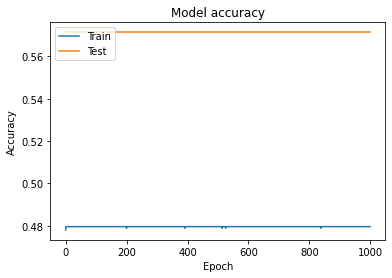

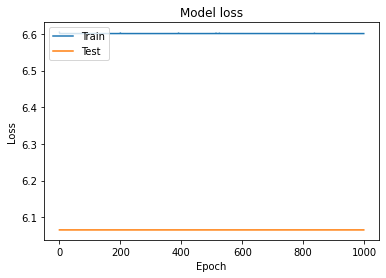

1309/1309 [==============================] - 0s 18us/step
Test score: 6.59499179615694
Test accuracy: 0.48051947355270386
This los wil be testet:
cosine_proximity


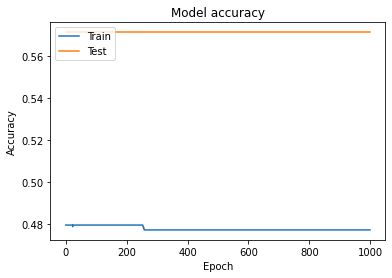

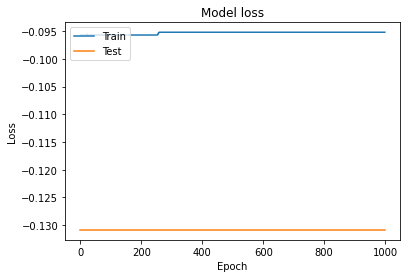

1309/1309 [==============================] - 0s 19us/step
Test score: -0.09558528140358018
Test accuracy: 0.4782276451587677
This optimizer wil be testet:
<class 'keras.optimizers.Nadam'>
This los wil be testet:
mean_squared_error


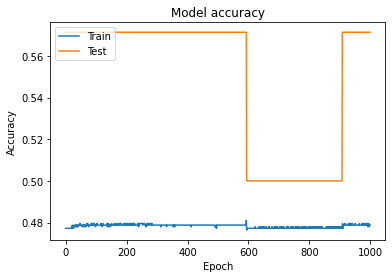

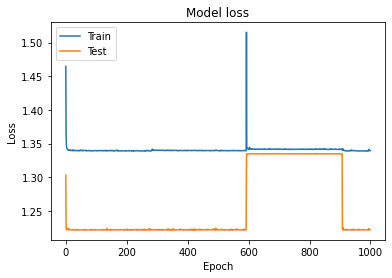

1309/1309 [==============================] - 0s 19us/step
Test score: 1.337930932948387
Test accuracy: 0.47975555062294006
This los wil be testet:
mean_absolute_error


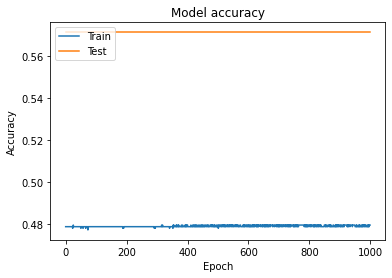

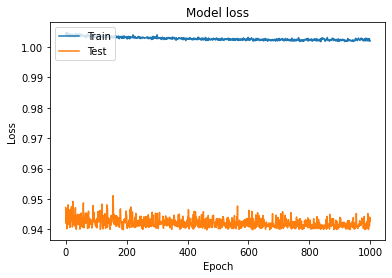

1309/1309 [==============================] - 0s 15us/step
Test score: 1.0013044949612424
Test accuracy: 0.48051947355270386
This los wil be testet:
mean_absolute_percentage_error


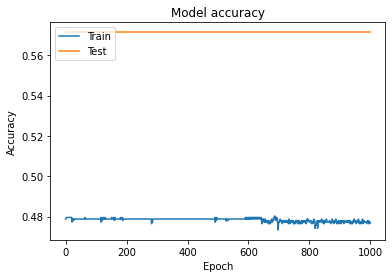

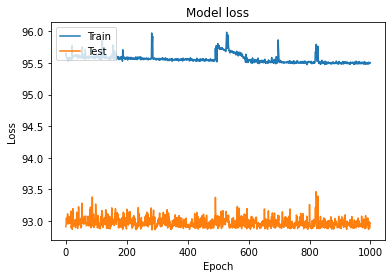

1309/1309 [==============================] - 0s 20us/step
Test score: 95.49760892793729
Test accuracy: 0.4782276451587677
This los wil be testet:
mean_squared_logarithmic_error


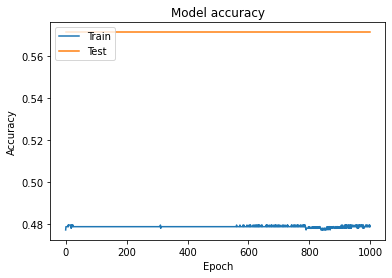

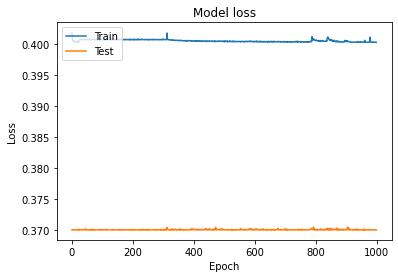

1309/1309 [==============================] - 0s 23us/step
Test score: 0.39989689566234854
Test accuracy: 0.47975555062294006
This los wil be testet:
squared_hinge


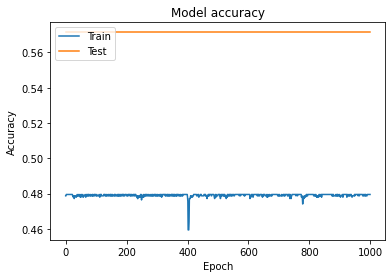

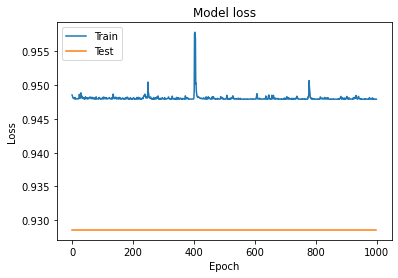

1309/1309 [==============================] - 0s 22us/step
Test score: 0.9476837640595491
Test accuracy: 0.48051947355270386
This los wil be testet:
hinge


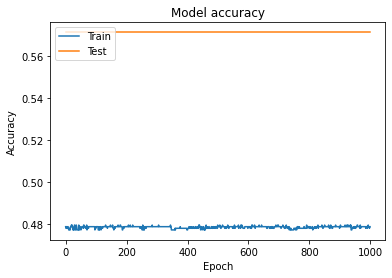

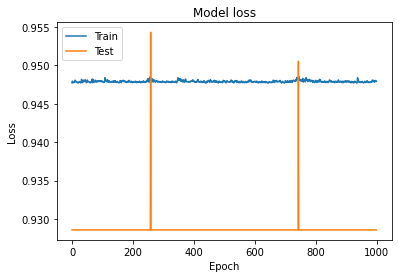

1309/1309 [==============================] - 0s 27us/step
Test score: 0.9476140052239526
Test accuracy: 0.47975555062294006
This los wil be testet:
categorical_hinge


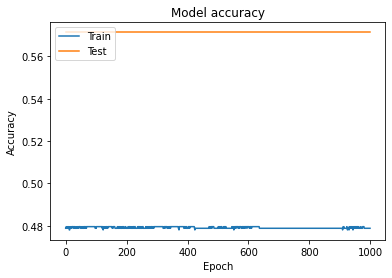

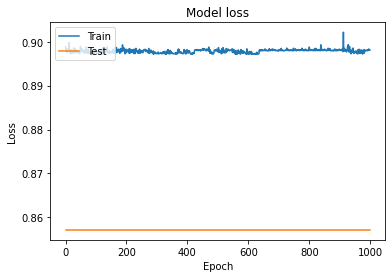

1309/1309 [==============================] - 0s 20us/step
Test score: 0.8976194863104474
Test accuracy: 0.47975555062294006
This los wil be testet:
logcosh


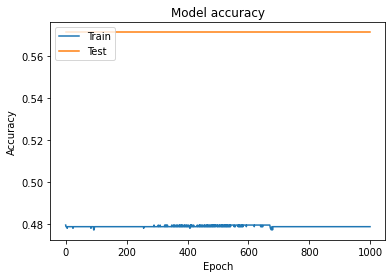

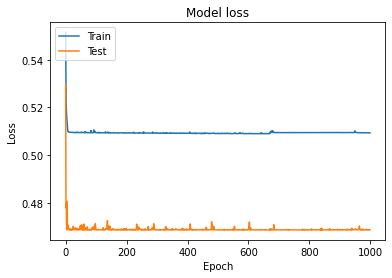

1309/1309 [==============================] - 0s 19us/step
Test score: 0.5088792869250587
Test accuracy: 0.47975555062294006
This los wil be testet:
huber_loss


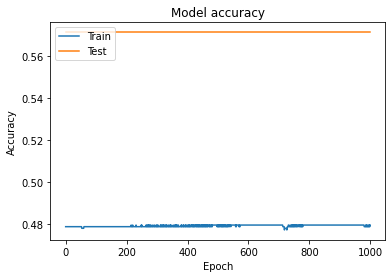

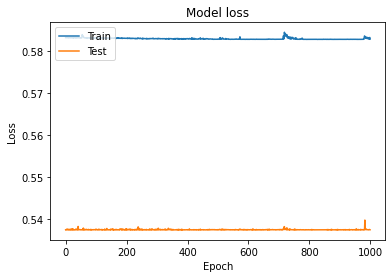

1309/1309 [==============================] - 0s 19us/step
Test score: 0.5823845699645801
Test accuracy: 0.48051947355270386
This los wil be testet:
categorical_crossentropy


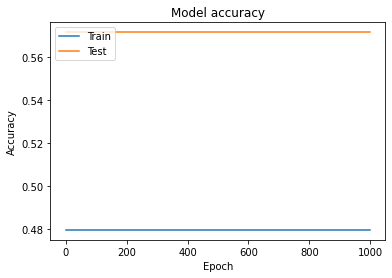

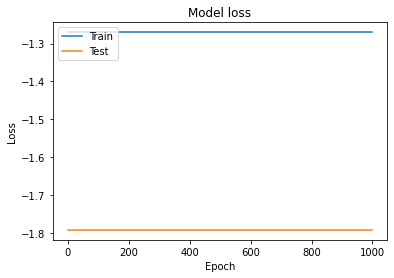

1309/1309 [==============================] - 0s 18us/step
Test score: -1.2754855979208366
Test accuracy: 0.48051947355270386
This los wil be testet:
binary_crossentropy


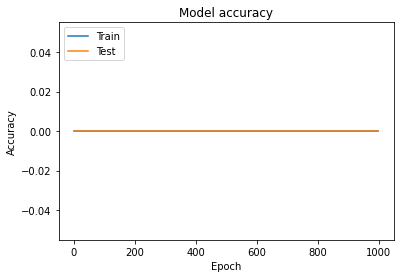

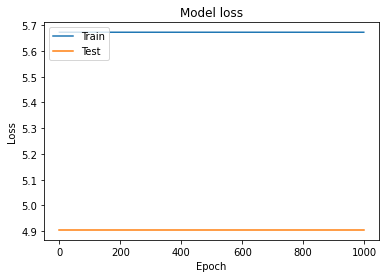

1309/1309 [==============================] - 0s 16us/step
Test score: 5.668037272847455
Test accuracy: 0.0
This los wil be testet:
kullback_leibler_divergence


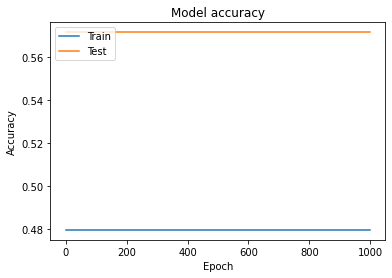

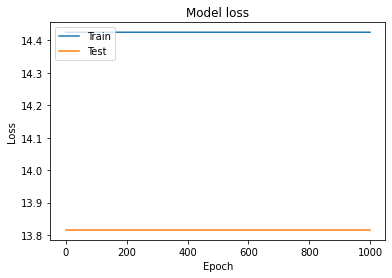

1309/1309 [==============================] - 0s 17us/step
Test score: 14.418861529042104
Test accuracy: 0.48051947355270386
This los wil be testet:
poisson


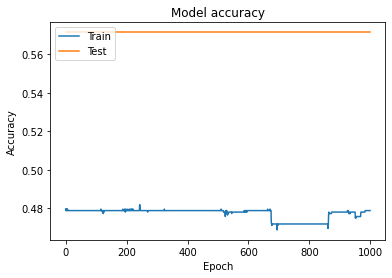

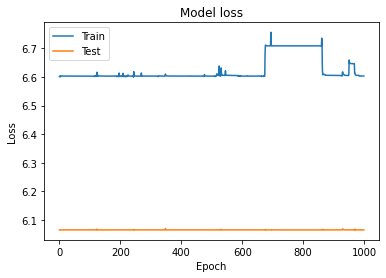

1309/1309 [==============================] - 0s 15us/step
Test score: 6.597242630010712
Test accuracy: 0.47975555062294006
This los wil be testet:
cosine_proximity


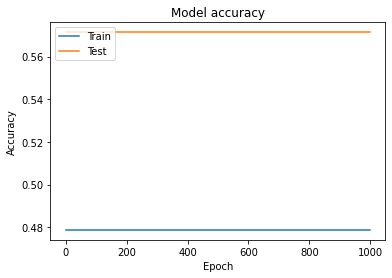

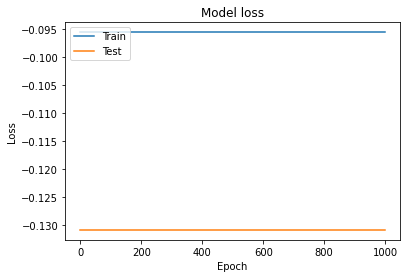

1309/1309 [==============================] - 0s 18us/step
Test score: -0.09591563069884153
Test accuracy: 0.47975555062294006
Best test score is: 0.9465553147179011
Best test acc is: 0.48051947355270386
Best optimization methode is:<class 'keras.optimizers.RMSprop'>Best los is:hinge


In [93]:
model_list = [optimizers.Adagrad, optimizers.SGD, optimizers.Adam,optimizers.RMSprop,optimizers.Adadelta,optimizers.Adamax,optimizers.Nadam]
scoreBest = 0
accBest = 0
trainLossBest = 100000
testLossBest = 100000
trainDiffBest = 1000000

nameLossBest = ""
nameOptimBest = ""

for optimization_method in model_list:
    print("This optimizer wil be testet:")
    print(optimization_method)
    for los in los_list:
        print("This los wil be testet:")
        print(los)
        model.compile(loss=los,optimizer = optimization_method(),metrics = ['accuracy'])
        history = model.fit(trainSet, Ycombined, validation_split=0.01, epochs=1000, batch_size=100, verbose=0)
        
        plot_accuracyhistory(history)
        plot_loss(history)
        score, acc = model.evaluate(trainSet, Ycombined,batch_size=100)
        print('Test score:', score)
        print('Test accuracy:', acc)
        trainLoss = (history.history['loss'])
        testLoss = (history.history['val_loss'])
        '''
        if score > scoreBest:
            scoreBest = score
        if  acc > accBest:
            accBest = acc
        '''

        trainDiff = abs(testLoss[-1] - trainLoss[-1])
        
        if  trainDiff < trainDiffBest:
            scoreBest = score
            accBest = acc
            trainDiffBest = trainDiff
            nameLossBest = los
            nameOptimBest = optimization_method
            model.save_weights("bestTitanicV1NoDrop.h5")
        

print('Best test score is:', scoreBest)
print('Best test acc is:', accBest)
print("Best optimization methode is:" + str(nameOptimBest) + "Best los is:" + str(nameLossBest))
    